<a href="https://colab.research.google.com/github/rich-hyun/Analysis_of_School_Safety_Incidents/blob/main/school_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 로드

In [ ]:
#한글 사용 가능
!sudo apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 18 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'

#2020년도 파일 분석

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import warnings
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
data='https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school-2020.csv'
df = pd.read_csv(data)
df.head()

,구분,학교명,지역,교육청,설립유형,학교급,사고자구분,사고자성별,사고자학년,사고접수일,사고발생일,사고발생요일,사고발생시간,사고시간,사고장소,사고부위,사고형태,사고매개물,사고당시활동
0,A0000001,치악초등학교,강원,원주교육지원청,공립,초,일반학생,여,5학년,2020-01-10,2018-11-01,목,16:00,특별활동,교실,다리,기타,기타,실험실습
1,A0000002,정선초등학교,강원,정선교육지원청,공립,초,일반학생,여,6학년,2020-01-22,2019-06-14,금,14:40,체육수업,운동장,다리,낙상-넘어짐,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등),구기운동
2,A0000003,정선초등학교,강원,정선교육지원청,공립,초,일반학생,남,4학년,2020-01-22,2019-06-20,목,11:30,학교행사,교외활동,다리,낙상-넘어짐,기타,기타운동
3,A0000004,태장초등학교,강원,원주교육지원청,공립,초,일반학생,남,6학년,2020-06-19,2019-08-30,금,13:50,체육수업,부속시설,손,물리적힘 노출,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등),구기운동
4,A0000005,버들중학교,강원,원주교육지원청,공립,중,일반학생,여,2학년,2020-02-07,2019-10-08,화,09:40,학교행사,운동장,다리,낙상-미끄러짐,건물(문/창문/바닥/벽 등),장난/놀이


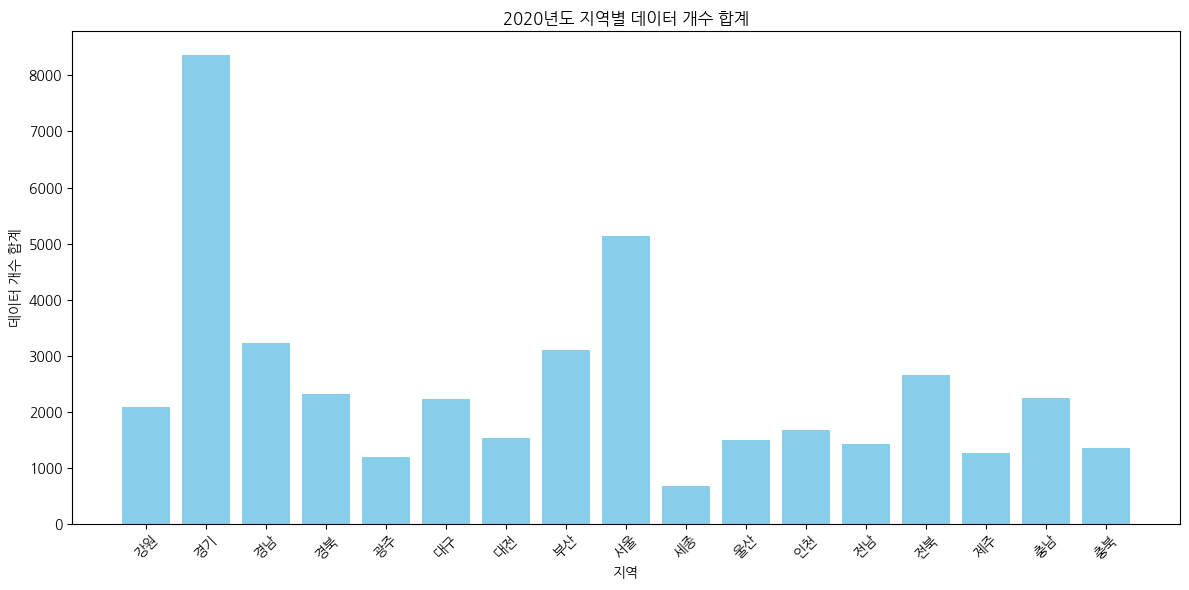

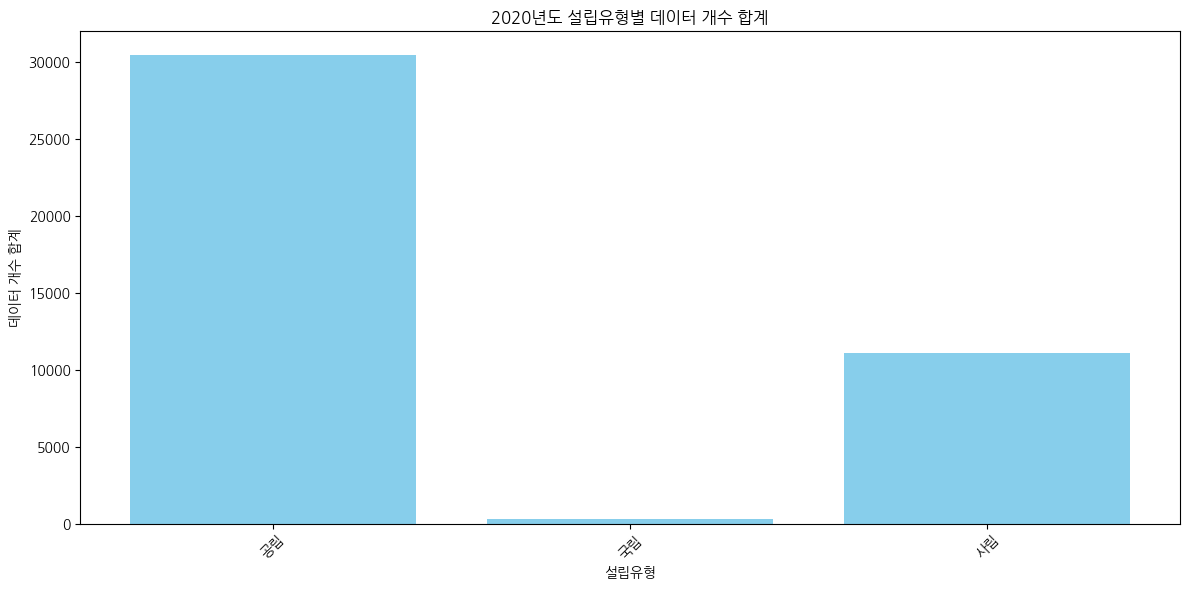

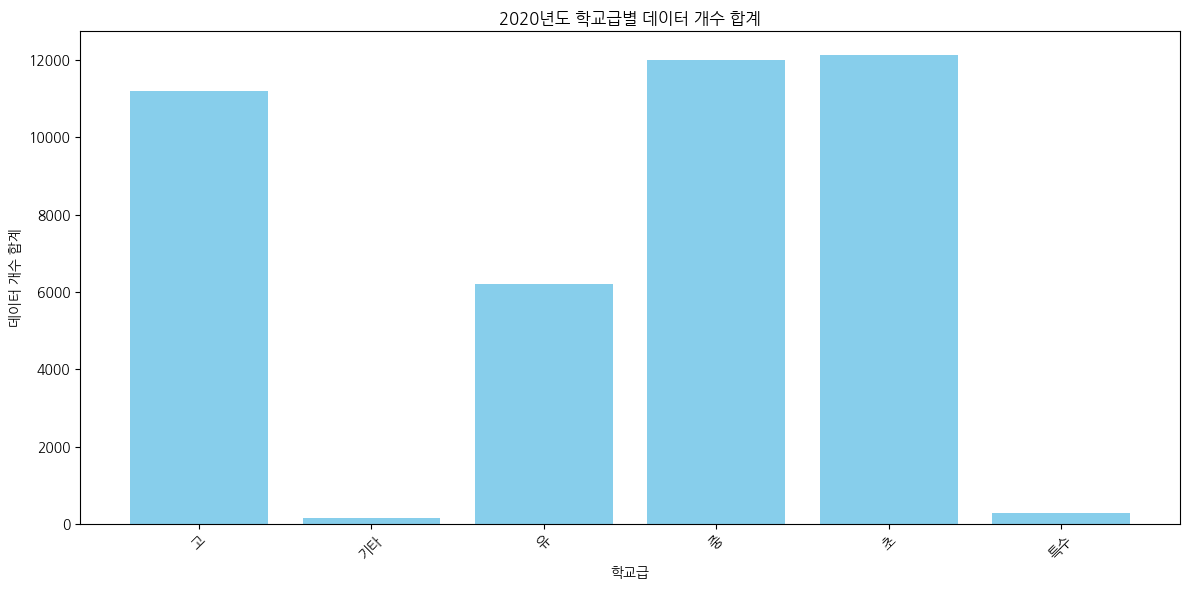

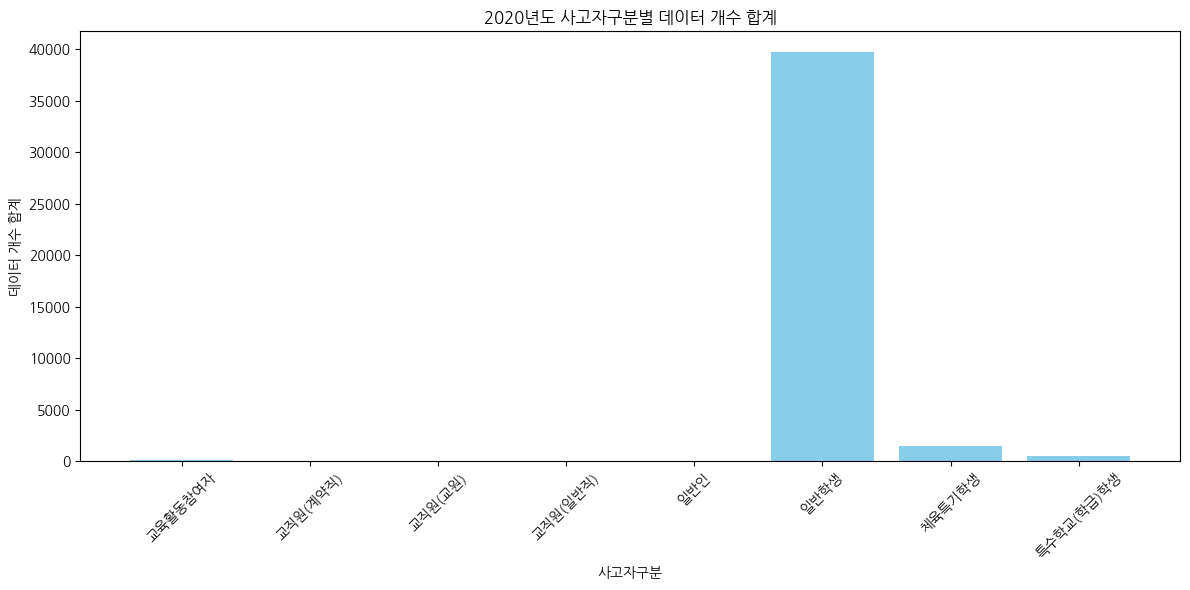

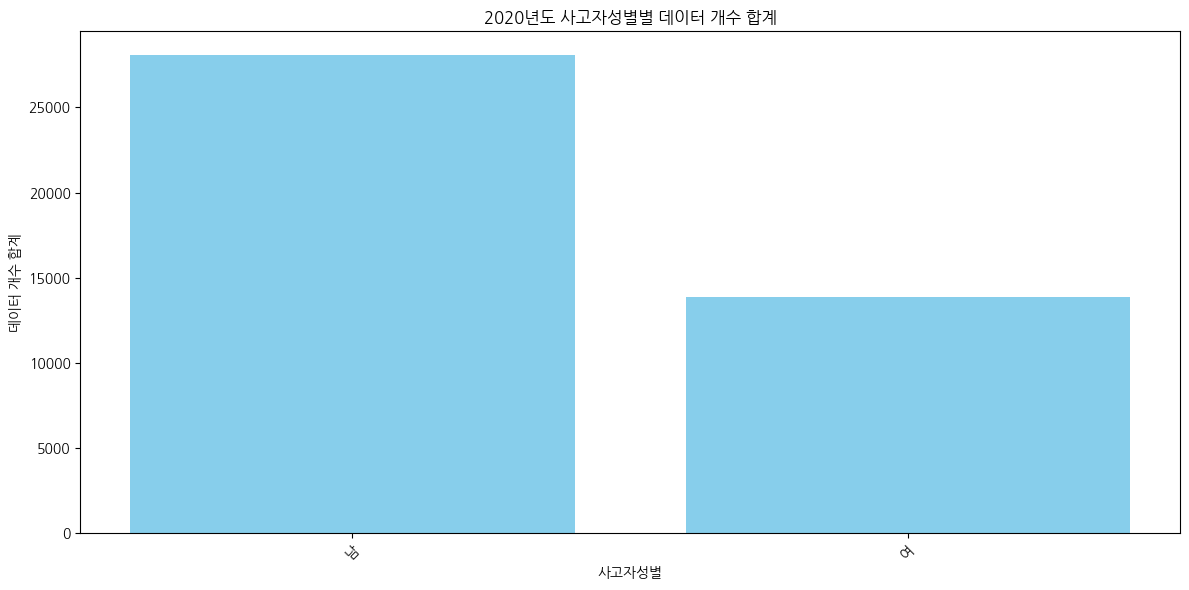

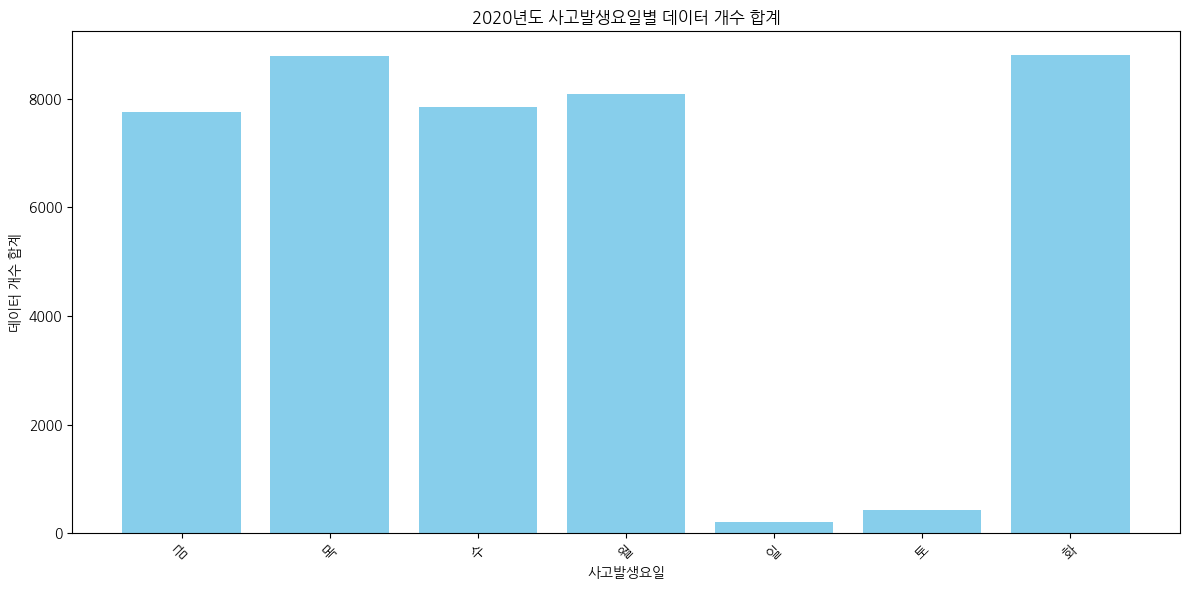

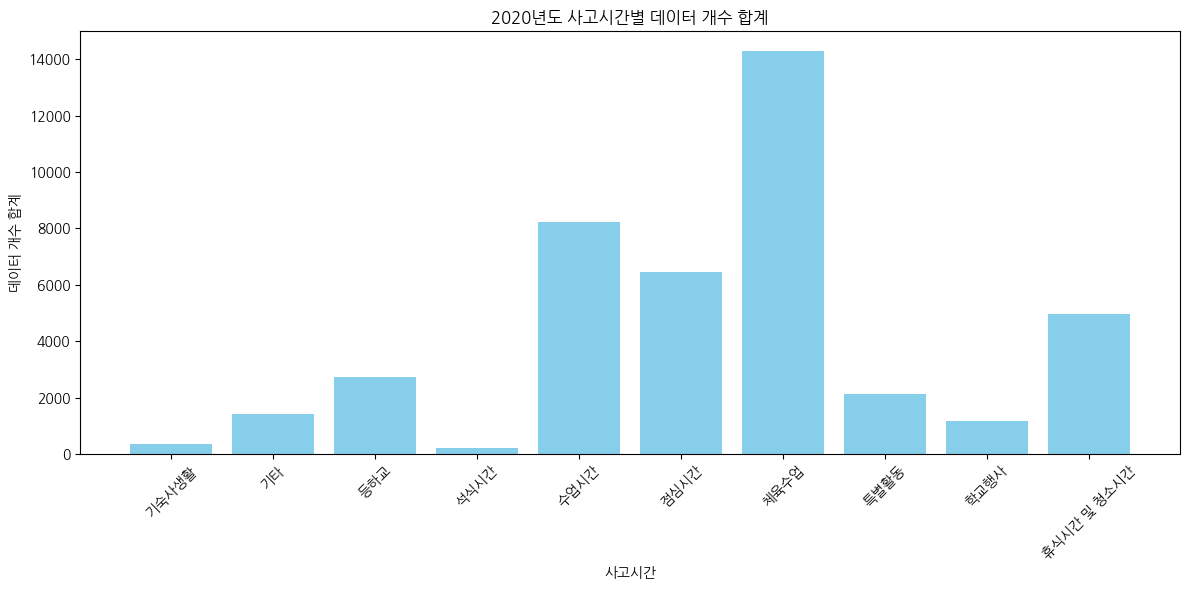

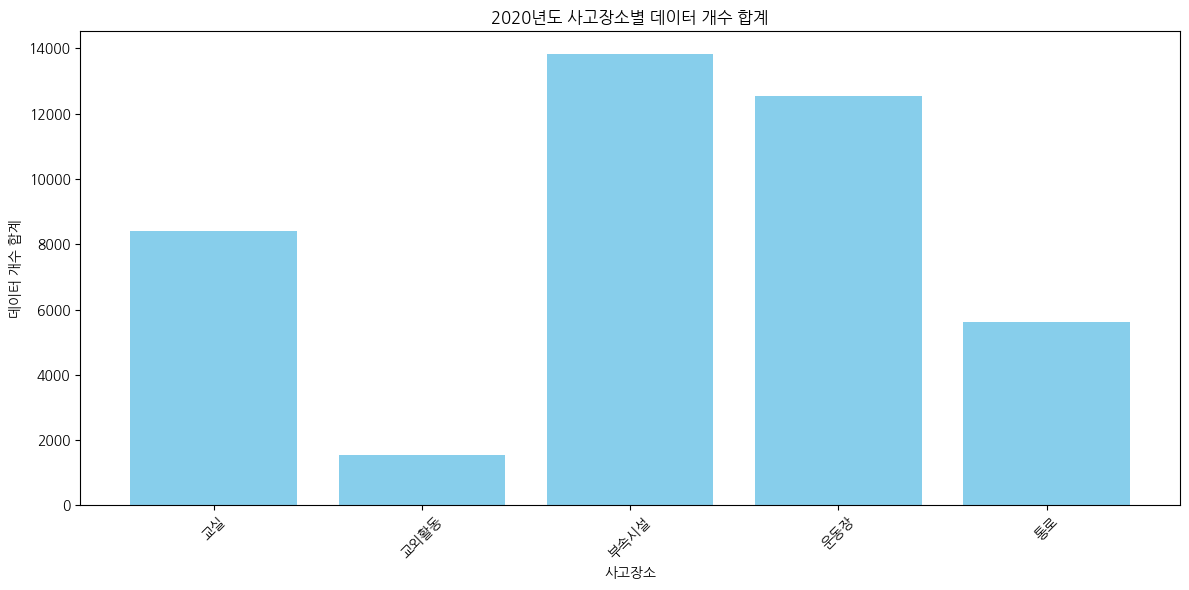

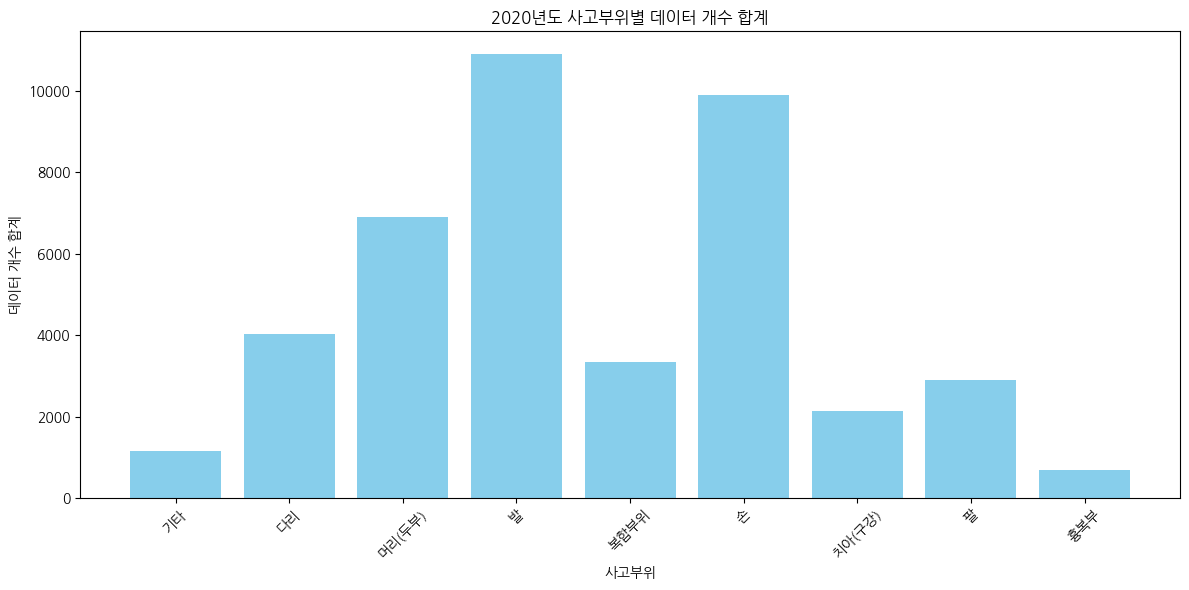

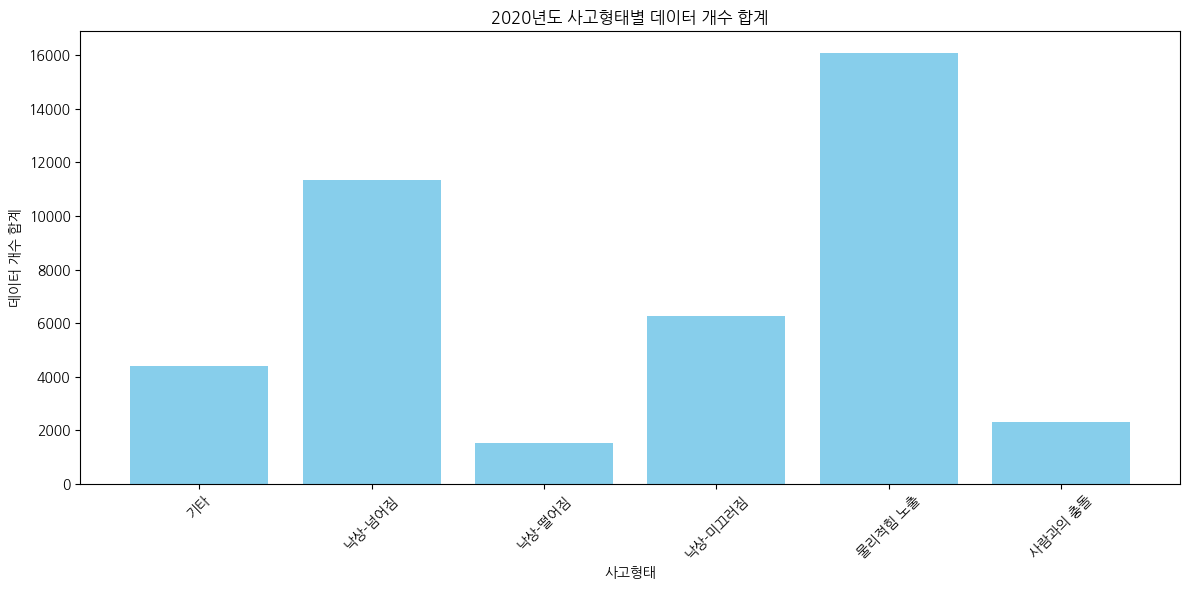

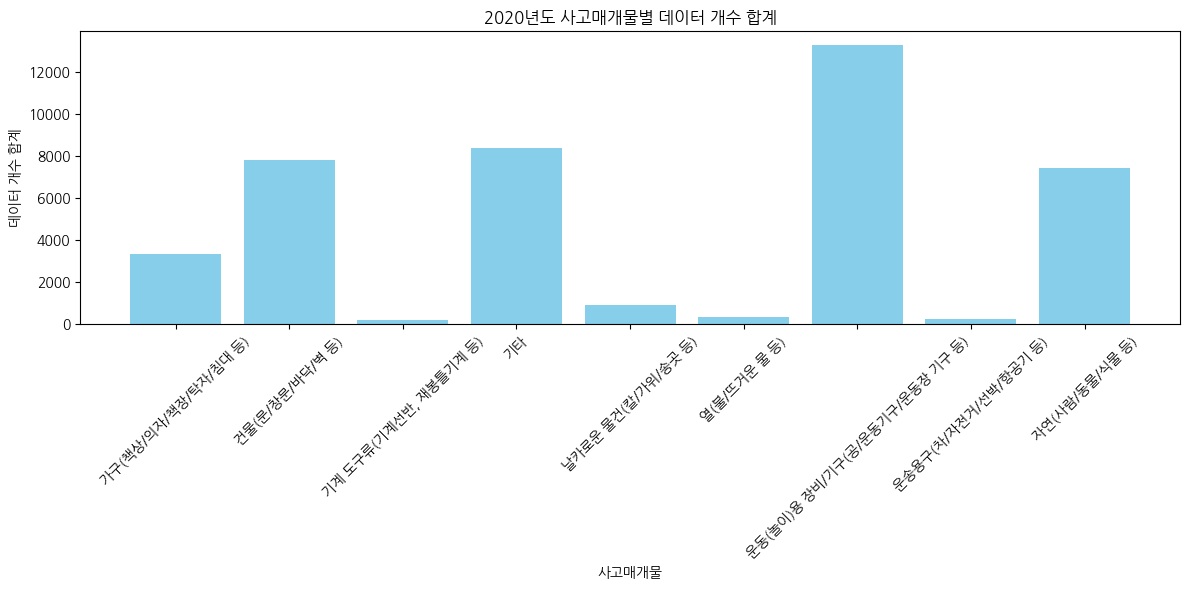

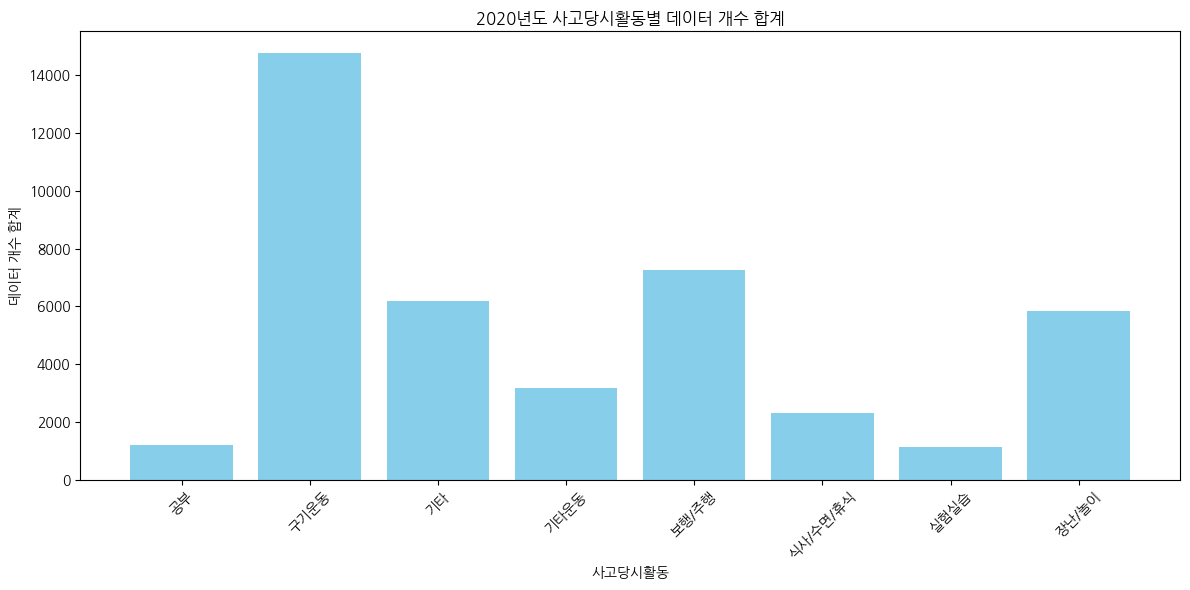

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
data = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school-2020.csv'
df = pd.read_csv(data)

# 그래프를 그릴 변수 리스트
variables = ['지역', '설립유형', '학교급', '사고자구분', '사고자성별', '사고발생요일', '사고시간', '사고장소', '사고부위', '사고형태', '사고매개물', '사고당시활동']

# 각 변수별로 바 그래프를 그립니다.
for var in variables:
    # 변수별로 그룹화하여 데이터 개수 합을 계산합니다.
    grouped = df.groupby(var).size().reset_index(name='개수합계')

    # 바 그래프를 그립니다.
    plt.figure(figsize=(12, 6))  # 그래프의 크기 설정
    plt.bar(grouped[var], grouped['개수합계'], color='skyblue')
    plt.title(f'2020년도 {var}별 데이터 개수 합계')  # 그래프 제목
    plt.xlabel(var)  # x축 레이블
    plt.ylabel('데이터 개수 합계')  # y축 레이블
    plt.xticks(rotation=45)  # x축 레이블을 45도로 회전하여 표시
    # 그래프를 화면에 표시합니다.
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# CSV 파일을 읽어옵니다.
data = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school-2020.csv'
df = pd.read_csv(data)

# '사고발생시간' 열을 시간 형식으로 변환합니다.
df['사고발생시간'] = pd.to_datetime(df['사고발생시간'], errors='coerce')

# 00시부터 24시까지 30분 단위로 값 측정하여 출력합니다.
for hour in range(0, 24):
    for minute in [0, 30]:
        # 해당 시간대와 분에 해당하는 데이터를 필터링합니다.
        filtered_data = df[(df['사고발생시간'].dt.hour == hour) & (df['사고발생시간'].dt.minute == minute)]

        # 출력 형식을 수정하여 30분 단위를 표현합니다.
        next_minute = (minute + 30) % 60
        if next_minute == 0:
            end_time = f'{hour + 1:02d}:{next_minute:02d}'
        else:
            end_time = f'{hour:02d}:{next_minute:02d}'

        # 해당 시간대와 분의 데이터 개수를 출력합니다.
        start_time = f'{hour:02d}:{minute:02d}'
        print(f'{start_time} - {end_time} : {len(filtered_data)}건')

00:00 - 00:30 : 65건
00:30 - 01:00 : 1건
01:00 - 01:30 : 75건
01:30 - 02:00 : 18건
02:00 - 02:30 : 4건
02:30 - 03:00 : 4건
03:00 - 03:30 : 3건
03:30 - 04:00 : 3건
04:00 - 04:30 : 2건
04:30 - 05:00 : 1건
05:00 - 05:30 : 0건
05:30 - 06:00 : 1건
06:00 - 06:30 : 4건
06:30 - 07:00 : 9건
07:00 - 07:30 : 20건
07:30 - 08:00 : 34건
08:00 - 08:30 : 96건
08:30 - 09:00 : 185건
09:00 - 09:30 : 394건
09:30 - 10:00 : 779건
10:00 - 10:30 : 1099건
10:30 - 11:00 : 1114건
11:00 - 11:30 : 1563건
11:30 - 12:00 : 1080건
12:00 - 12:30 : 1054건
12:30 - 13:00 : 1077건
13:00 - 13:30 : 1542건
13:30 - 14:00 : 983건
14:00 - 14:30 : 1171건
14:30 - 15:00 : 806건
15:00 - 15:30 : 993건
15:30 - 16:00 : 685건
16:00 - 16:30 : 635건
16:30 - 17:00 : 314건
17:00 - 17:30 : 256건
17:30 - 18:00 : 127건
18:00 - 18:30 : 129건
18:30 - 19:00 : 75건
19:00 - 19:30 : 78건
19:30 - 20:00 : 40건
20:00 - 20:30 : 40건
20:30 - 21:00 : 41건
21:00 - 21:30 : 36건
21:30 - 22:00 : 27건
22:00 - 22:30 : 35건
22:30 - 23:00 : 19건
23:00 - 23:30 : 25건
23:30 - 24:00 : 12건


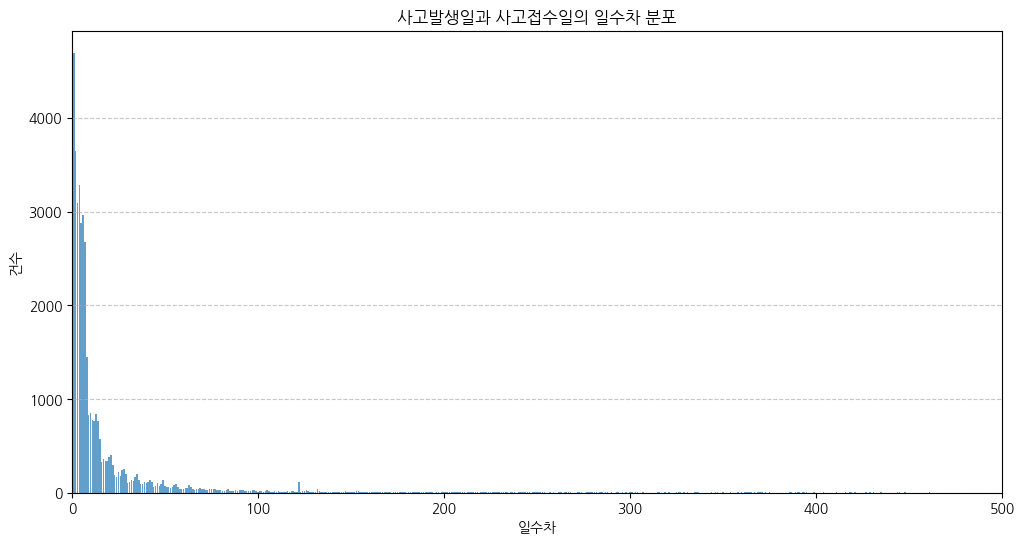

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
data = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school-2020.csv'
df = pd.read_csv(data)

# '사고발생일'과 '사고접수일' 열을 datetime 형식으로 변환합니다.
df['사고발생일'] = pd.to_datetime(df['사고발생일'], errors='coerce')
df['사고접수일'] = pd.to_datetime(df['사고접수일'], errors='coerce')

# '사고발생일'과 '사고접수일'의 차를 계산하여 '일수차' 열에 추가합니다.
df['일수차'] = (df['사고접수일'] - df['사고발생일']).dt.days

# '일수차'별 카운트를 계산합니다.
counts = df['일수차'].value_counts().sort_index()

# 바그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
plt.bar(counts.index, counts.values, align='center', alpha=0.7)
plt.xlabel('일수차')
plt.ylabel('건수')
plt.title('사고발생일과 사고접수일의 일수차 분포')
plt.xlim(0, 500)  # x축 범위 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#2021년도 파일 분석

In [ ]:
data='https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2021.csv'
df_2021 = pd.read_csv(data)
df_2021.head()

,구분,학교명,지역,교육청,설립유형,학교급,사고자구분,사고자성별,사고자학년,사고접수일,사고발생일,사고발생요일,사고발생시간,사고시간,사고장소,사고부위,사고형태,사고매개물,사고당시활동
0,B0000001,제주중앙중학교,제주,제주시교육지원청,공립,중학교,일반학생,남,3학년,2021-02-01,2020-07-17,금,14:50,체육수업,부속시설,손,물리적힘 노출,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등),구기운동
1,B0000002,함덕초등학교,제주,제주시교육지원청,공립,초등학교,일반학생,남,3학년,2021-02-03,2020-11-03,화,08:30,등하교,교외활동,치아(구강),낙상-넘어짐,자연(사람/동물/식물 등),기타
2,B0000003,남원초등학교,제주,서귀포시교육지원청,공립,초등학교,일반학생,여,4학년,2021-03-09,2020-11-13,금,09:55,체육수업,부속시설,다리,낙상-넘어짐,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등),기타
3,B0000004,조천초등학교,제주,제주시교육지원청,공립,초등학교,특수학교(학급)학생,남,1학년,2021-12-13,2020-11-18,수,10:35,휴식시간 및 청소시간,교실,머리(두부),물리적힘 노출,기타,장난/놀이
4,B0000005,신성여자고등학교,제주,제주특별자치도교육청,사립,고등학교,일반학생,여,1학년,2021-02-19,2020-11-25,수,12:00,특별활동,부속시설,다리,낙상-넘어짐,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등),구기운동


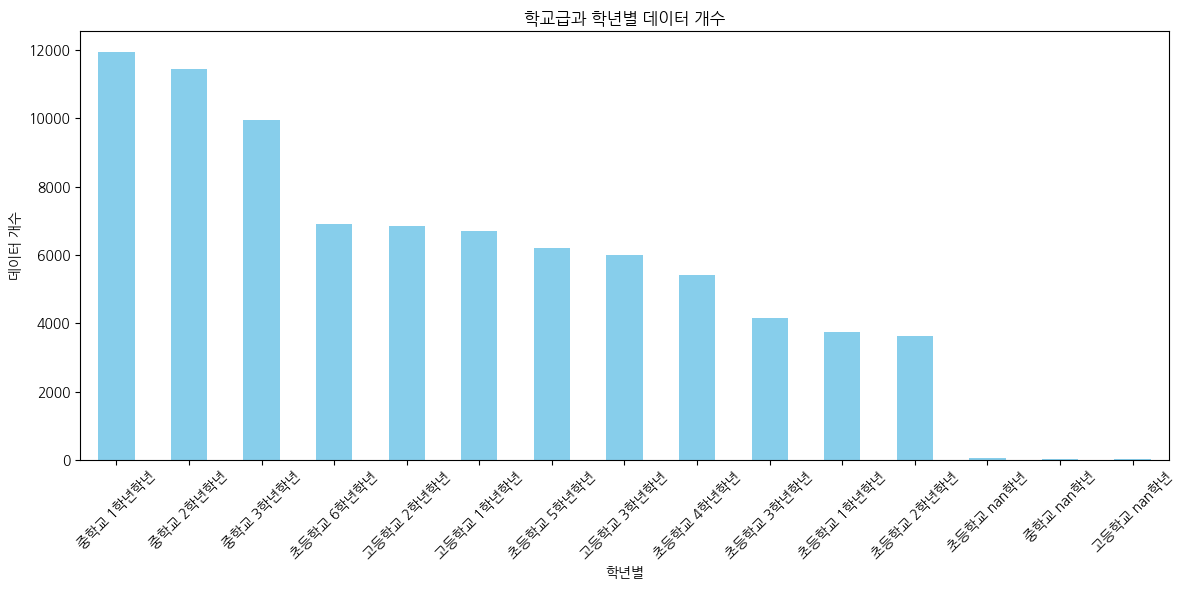

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
data2021 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2021.csv'
df_2021 = pd.read_csv(data2021)

# '학교급'에서 '초등학교', '중학교', '고등학교' 단어가 포함된 행을 필터링합니다.
school_levels = ['초등학교', '중학교', '고등학교']
filtered_df = df_2021[df_2021['학교급'].str.contains('|'.join(school_levels))]

# '사고자학년' 값을 합쳐서 새로운 열 '학년별'을 생성합니다.
filtered_df['학년별'] = filtered_df['학교급'] + ' ' + filtered_df['사고자학년'].astype(str) + '학년'

# '학년별'별 카운트를 계산합니다.
counts = filtered_df['학년별'].value_counts()

# 바 그래프를 그립니다.
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('학교급과 학년별 데이터 개수')
plt.xlabel('학년별')
plt.ylabel('데이터 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

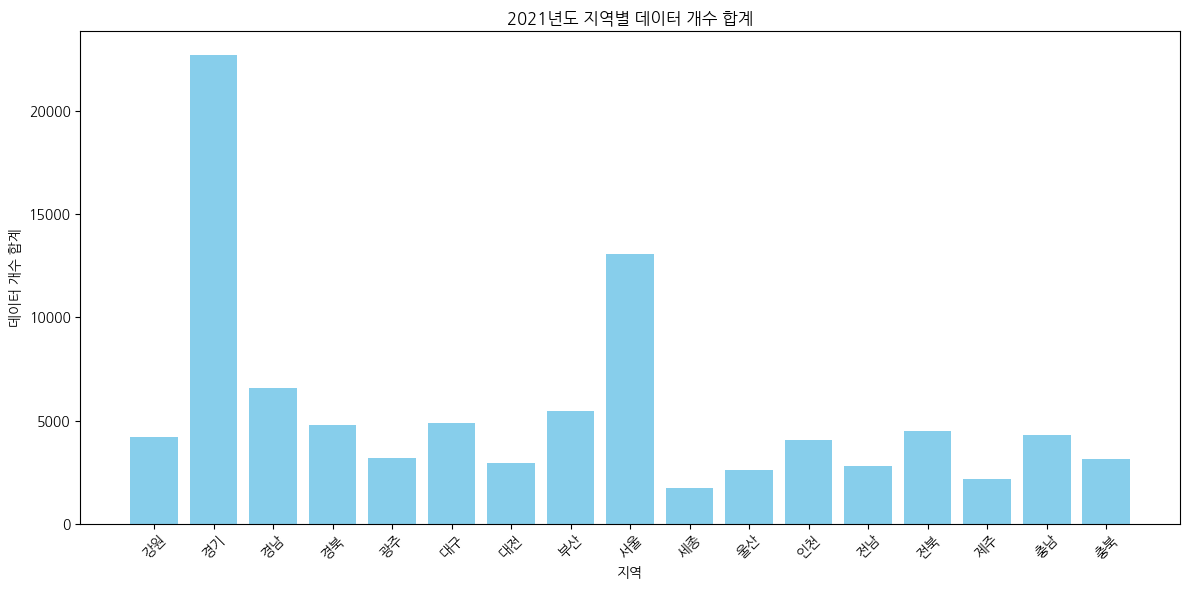

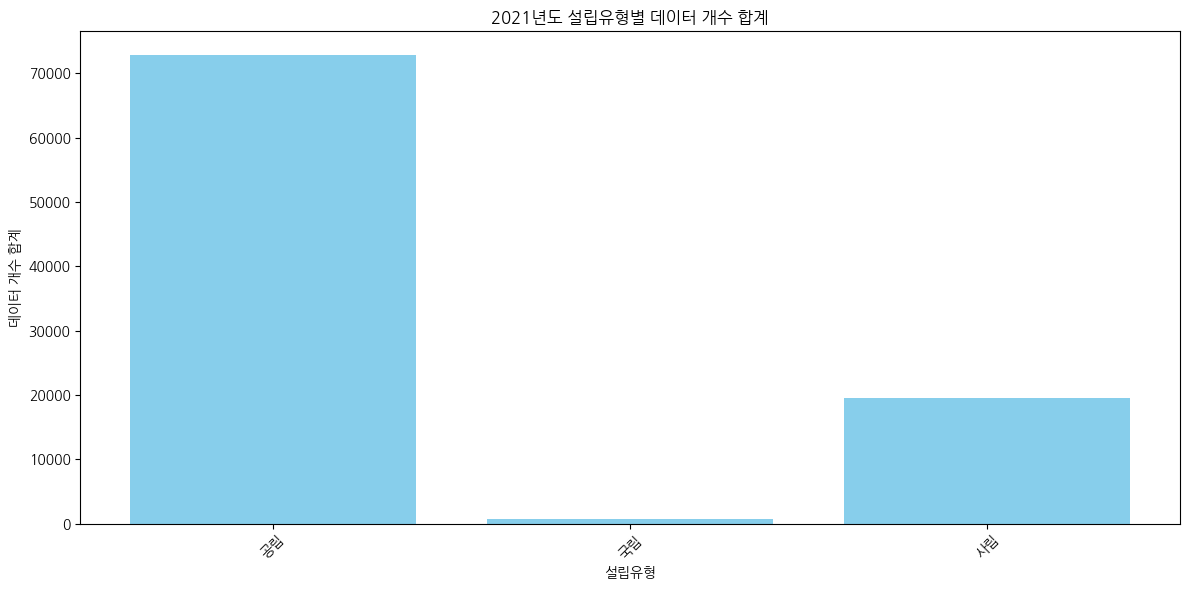

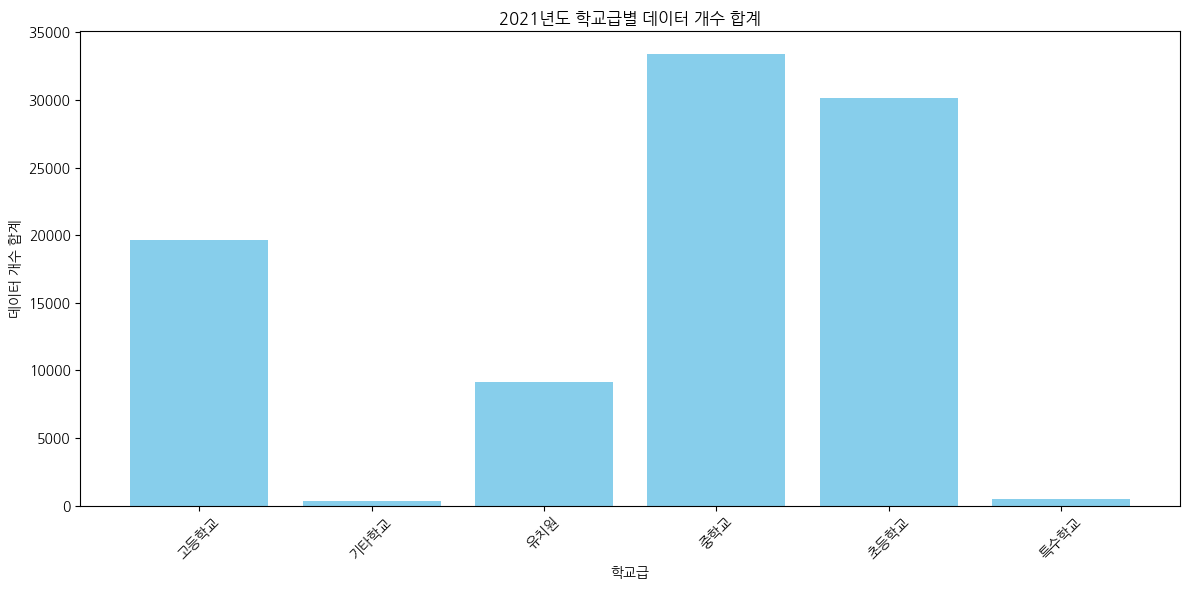

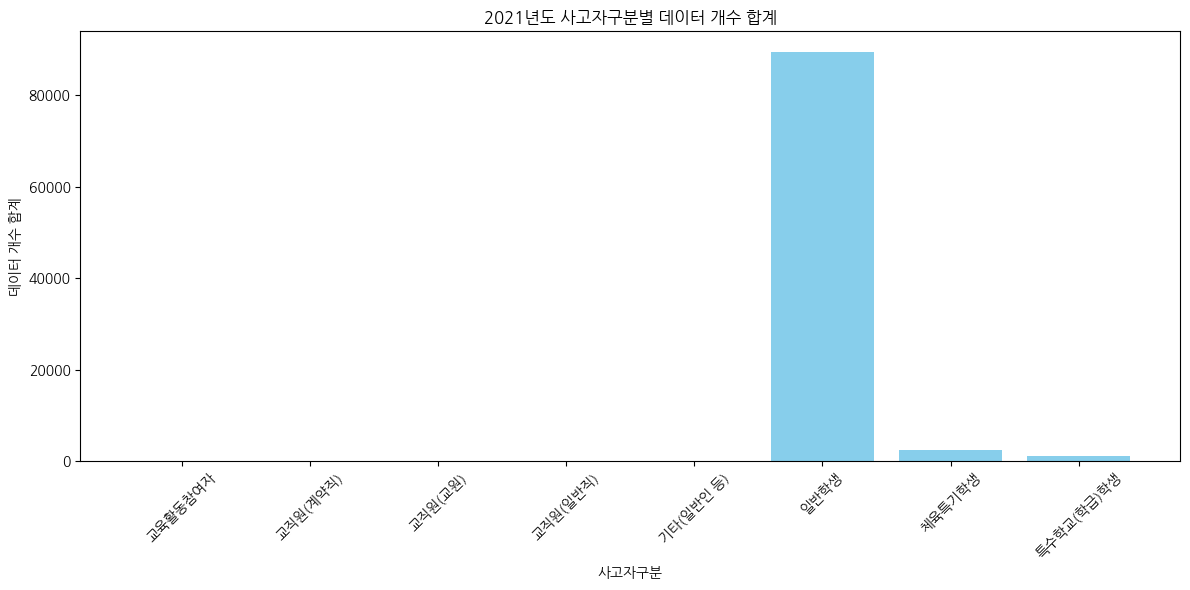

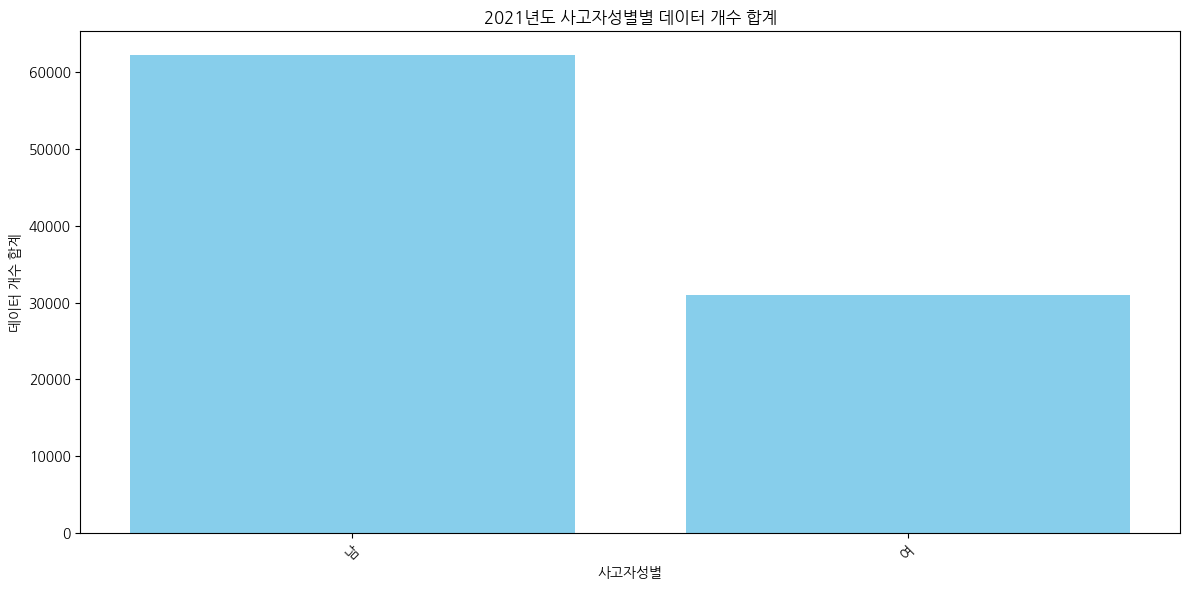

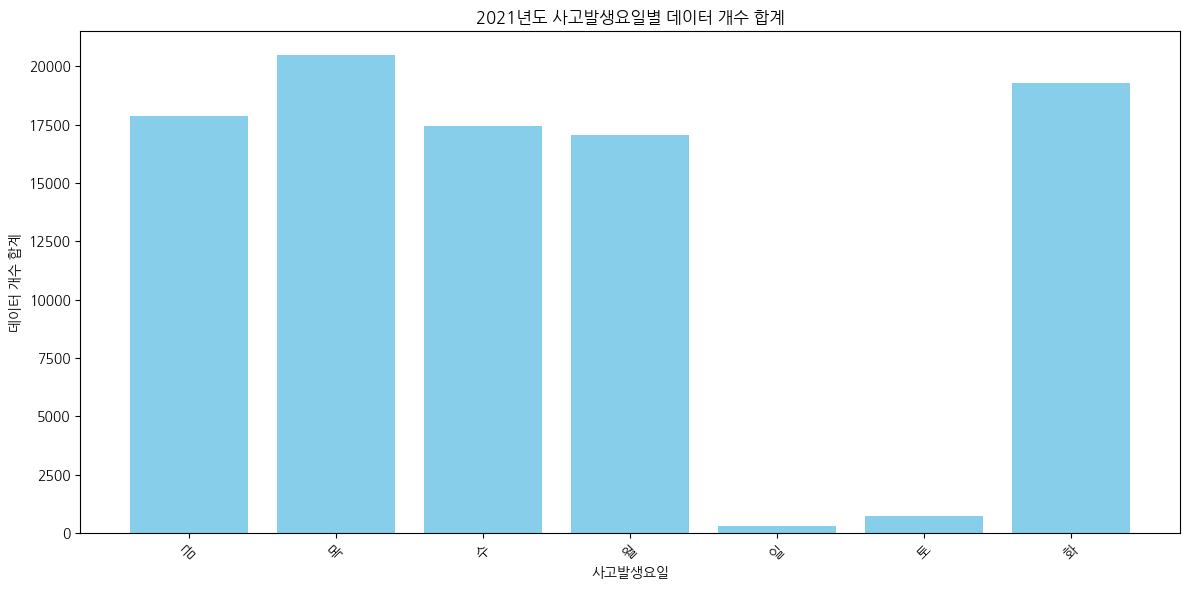

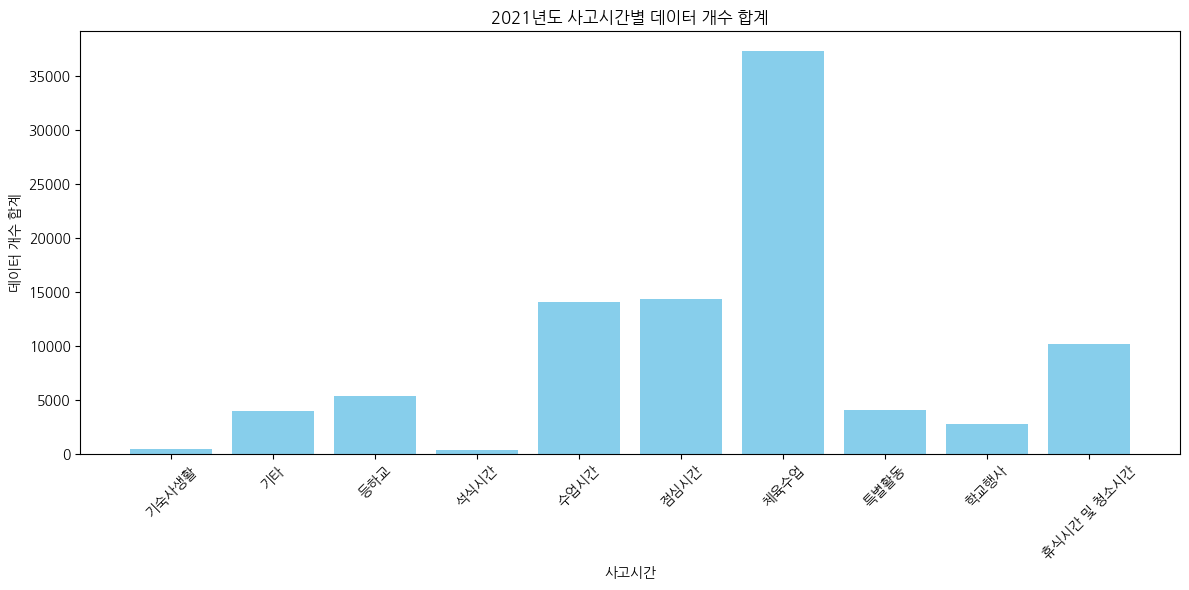

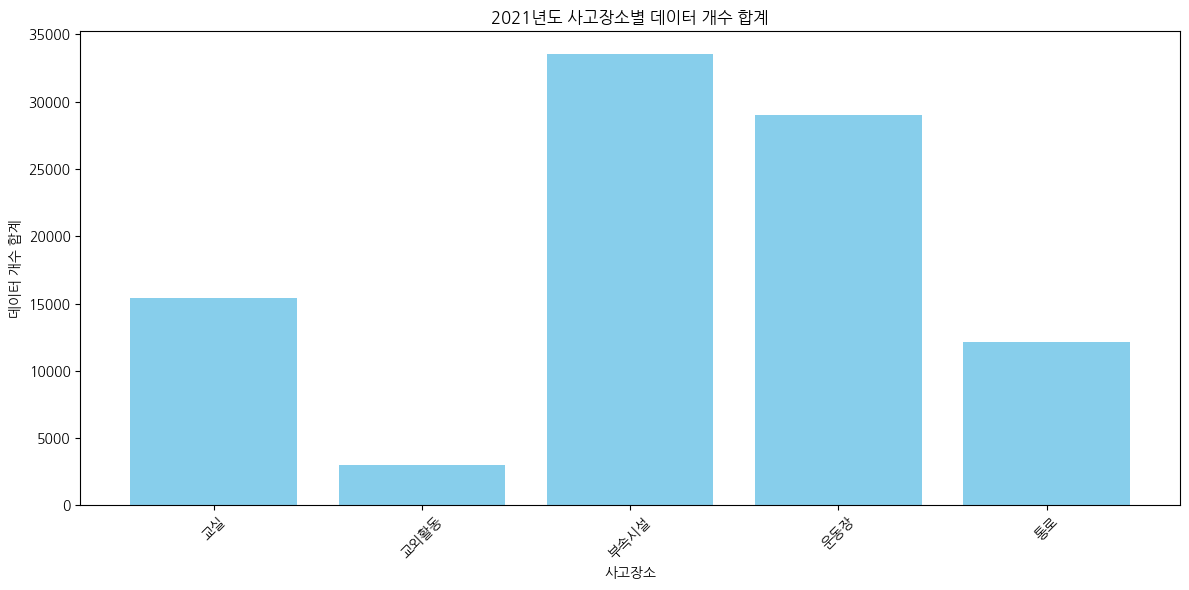

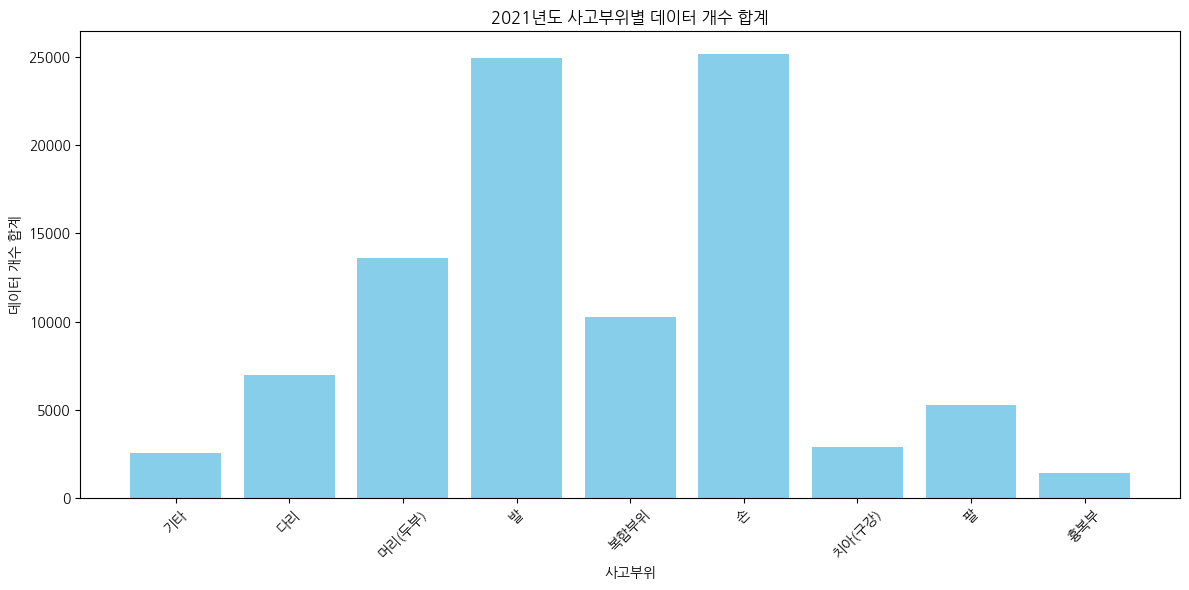

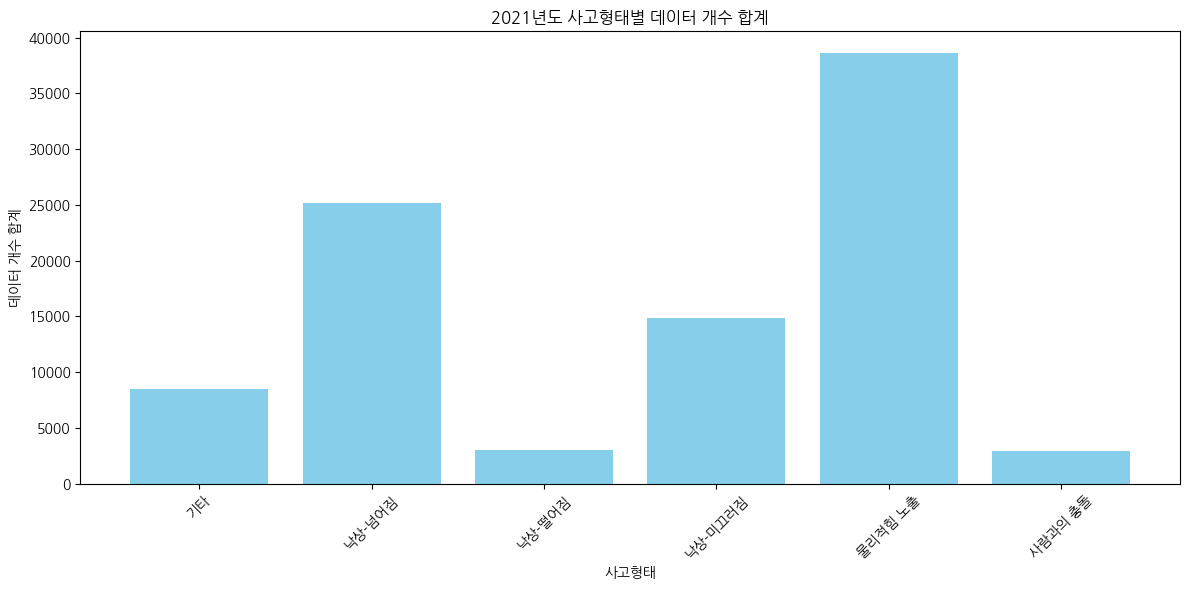

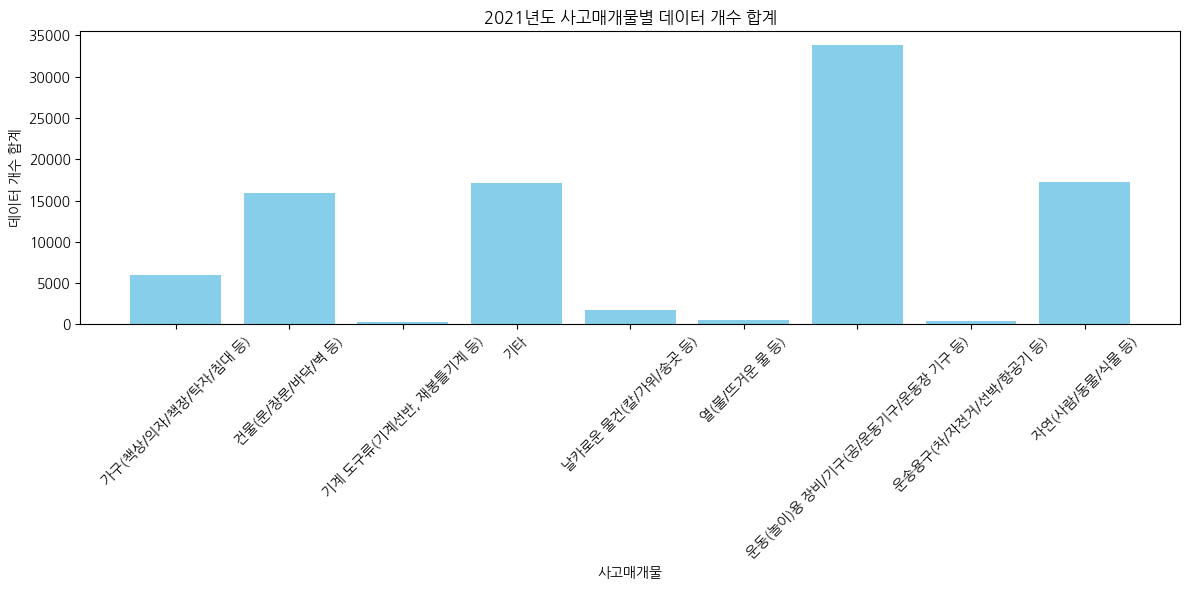

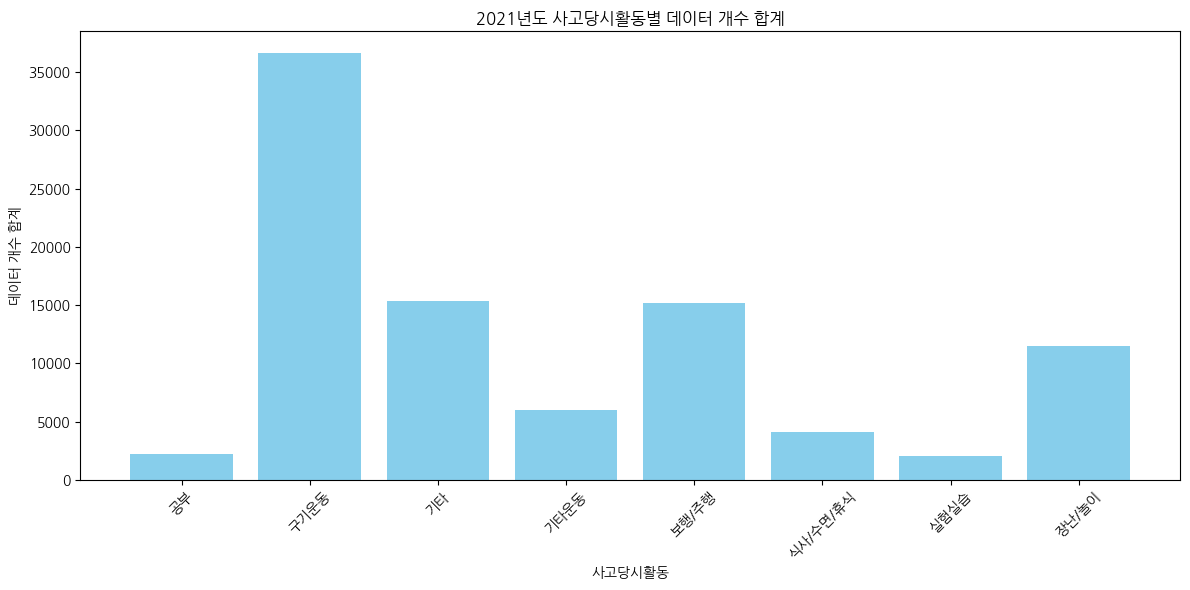

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
data2021='https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2021.csv'
df_2021 = pd.read_csv(data2021)

# 그래프를 그릴 변수 리스트
variables = ['지역', '설립유형', '학교급', '사고자구분', '사고자성별', '사고발생요일', '사고시간', '사고장소', '사고부위', '사고형태', '사고매개물', '사고당시활동']

# 각 변수별로 바 그래프를 그립니다.
for var in variables:
    # 변수별로 그룹화하여 데이터 개수 합을 계산합니다.
    grouped = df_2021.groupby(var).size().reset_index(name='개수합계')

    # 바 그래프를 그립니다.
    plt.figure(figsize=(12, 6))  # 그래프의 크기 설정
    plt.bar(grouped[var], grouped['개수합계'], color='skyblue')
    plt.title(f'2021년도 {var}별 데이터 개수 합계')  # 그래프 제목
    plt.xlabel(var)  # x축 레이블
    plt.ylabel('데이터 개수 합계')  # y축 레이블
    plt.xticks(rotation=45)  # x축 레이블을 45도로 회전하여 표시
    # 그래프를 화면에 표시합니다.
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# CSV 파일을 읽어옵니다.
data2021='https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2021.csv'
df = pd.read_csv(data2021)

# '사고발생시간' 열을 시간 형식으로 변환합니다.
df['사고발생시간'] = pd.to_datetime(df['사고발생시간'], errors='coerce')

# 00시부터 24시까지 30분 단위로 값 측정하여 출력합니다.
for hour in range(0, 24):
    for minute in [0, 30]:
        # 해당 시간대와 분에 해당하는 데이터를 필터링합니다.
        filtered_data = df[(df['사고발생시간'].dt.hour == hour) & (df['사고발생시간'].dt.minute == minute)]

        # 출력 형식을 수정하여 30분 단위를 표현합니다.
        next_minute = (minute + 30) % 60
        if next_minute == 0:
            end_time = f'{hour + 1:02d}:{next_minute:02d}'
        else:
            end_time = f'{hour:02d}:{next_minute:02d}'

        # 해당 시간대와 분의 데이터 개수를 출력합니다.
        start_time = f'{hour:02d}:{minute:02d}'
        print(f'{start_time} - {end_time} : {len(filtered_data)}건')

00:00 - 00:30 : 212건
00:30 - 01:00 : 7건
01:00 - 01:30 : 5건
01:30 - 02:00 : 9건
02:00 - 02:30 : 6건
02:30 - 03:00 : 5건
03:00 - 03:30 : 6건
03:30 - 04:00 : 4건
04:00 - 04:30 : 2건
04:30 - 05:00 : 1건
05:00 - 05:30 : 1건
05:30 - 06:00 : 0건
06:00 - 06:30 : 2건
06:30 - 07:00 : 7건
07:00 - 07:30 : 14건
07:30 - 08:00 : 56건
08:00 - 08:30 : 153건
08:30 - 09:00 : 440건
09:00 - 09:30 : 835건
09:30 - 10:00 : 1918건
10:00 - 10:30 : 2548건
10:30 - 11:00 : 2429건
11:00 - 11:30 : 3372건
11:30 - 12:00 : 2645건
12:00 - 12:30 : 2381건
12:30 - 13:00 : 2583건
13:00 - 13:30 : 3303건
13:30 - 14:00 : 2225건
14:00 - 14:30 : 2520건
14:30 - 15:00 : 1751건
15:00 - 15:30 : 1995건
15:30 - 16:00 : 1380건
16:00 - 16:30 : 1126건
16:30 - 17:00 : 522건
17:00 - 17:30 : 423건
17:30 - 18:00 : 223건
18:00 - 18:30 : 202건
18:30 - 19:00 : 152건
19:00 - 19:30 : 167건
19:30 - 20:00 : 77건
20:00 - 20:30 : 88건
20:30 - 21:00 : 55건
21:00 - 21:30 : 43건
21:30 - 22:00 : 29건
22:00 - 22:30 : 39건
22:30 - 23:00 : 13건
23:00 - 23:30 : 27건
23:30 - 24:00 : 8건


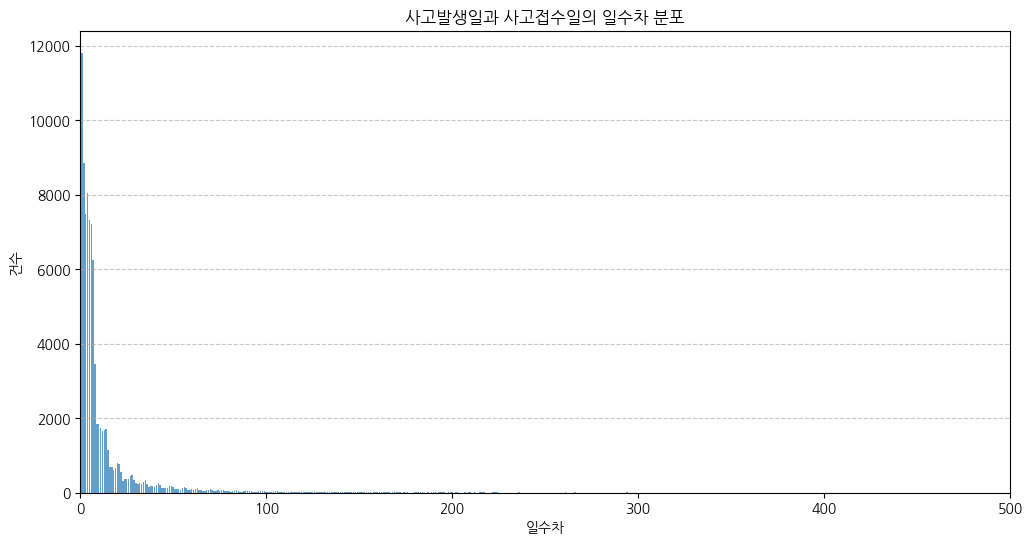

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
data2021='https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2021.csv'
df = pd.read_csv(data2021)

# '사고발생일'과 '사고접수일' 열을 datetime 형식으로 변환합니다.
df['사고발생일'] = pd.to_datetime(df['사고발생일'], errors='coerce')
df['사고접수일'] = pd.to_datetime(df['사고접수일'], errors='coerce')

# '사고발생일'과 '사고접수일'의 차를 계산하여 '일수차' 열에 추가합니다.
df['일수차'] = (df['사고접수일'] - df['사고발생일']).dt.days

# '일수차'별 카운트를 계산합니다.
counts = df['일수차'].value_counts().sort_index()

# 바그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
plt.bar(counts.index, counts.values, align='center', alpha=0.7)
plt.xlabel('일수차')
plt.ylabel('건수')
plt.title('사고발생일과 사고접수일의 일수차 분포')
plt.xlim(0, 500)  # x축 범위 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#2022년도 데이터 분석

In [ ]:
data='https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2022.csv'
df = pd.read_csv(data)
df.head()

,구분,학교명,지역,교육청,설립유형,학교급,사고자구분,사고자성별,사고자학년,사고접수일,사고발생일,사고발생요일,사고발생시간,사고시간,사고장소,사고부위,사고형태,사고매개물,사고당시활동
0,C0000001,반곡중학교,세종,세종특별자치시교육청,공립,중학교,일반학생,여,3학년,2022-04-25,2022-04-20,수,10:45,체육수업,운동장,복합부위,낙상-넘어짐,건물(문/창문/바닥/벽 등),기타
1,C0000002,상산고등학교,전북,전라북도교육청,사립,고등학교,일반학생,여,1학년,2022-09-22,2022-09-22,목,10:45,체육수업,운동장,발,낙상-넘어짐,기타,기타
2,C0000003,목포정명여자중학교,전남,목포교육지원청,사립,중학교,일반학생,여,3학년,2022-05-24,2022-04-07,목,10:30,기타,운동장,발,낙상-넘어짐,자연(사람/동물/식물 등),기타
3,C0000004,계룡중학교,경남,거제교육지원청,공립,중학교,일반학생,남,2학년,2022-04-26,2022-04-20,수,13:50,체육수업,운동장,손,물리적힘 노출,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등),구기운동
4,C0000005,안남중학교,경남,창원교육지원청,공립,중학교,일반학생,여,2학년,2022-10-12,2022-07-11,월,11:30,체육수업,부속시설,손,물리적힘 노출,운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등),기타


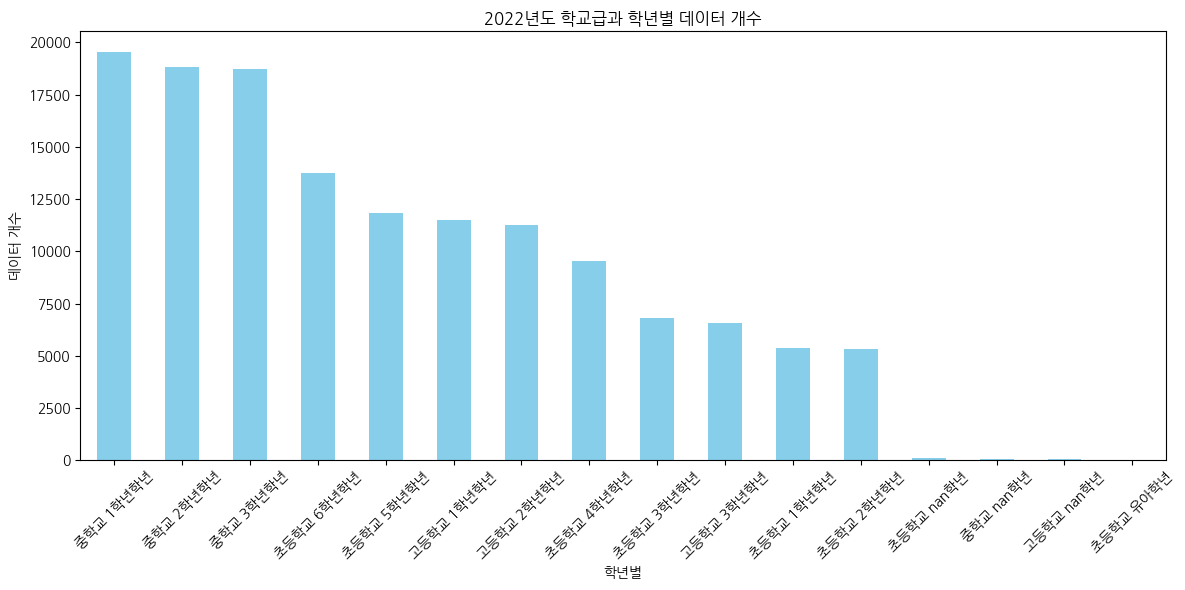

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
data2021 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2022.csv'
df_2021 = pd.read_csv(data2021)

# '학교급'에서 '초등학교', '중학교', '고등학교' 단어가 포함된 행을 필터링합니다.
school_levels = ['초등학교', '중학교', '고등학교']
filtered_df = df_2021[df_2021['학교급'].str.contains('|'.join(school_levels))]

# '사고자학년' 값을 합쳐서 새로운 열 '학년별'을 생성합니다.
filtered_df['학년별'] = filtered_df['학교급'] + ' ' + filtered_df['사고자학년'].astype(str) + '학년'

# '학년별'별 카운트를 계산합니다.
counts = filtered_df['학년별'].value_counts()

# 바 그래프를 그립니다.
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('2022년도 학교급과 학년별 데이터 개수')
plt.xlabel('학년별')
plt.ylabel('데이터 개수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

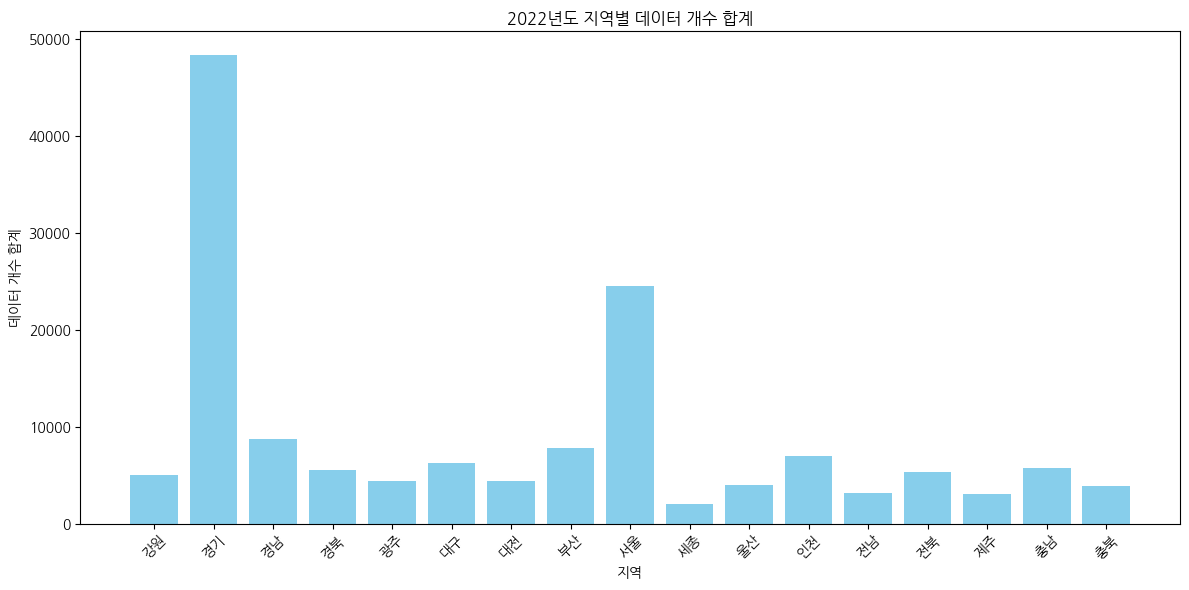

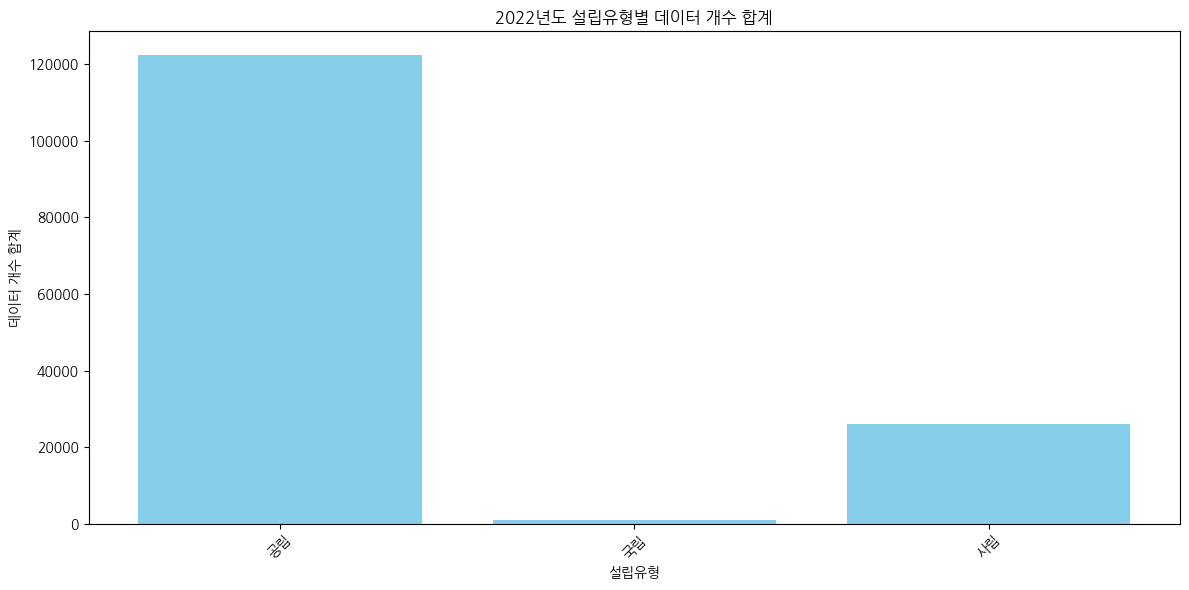

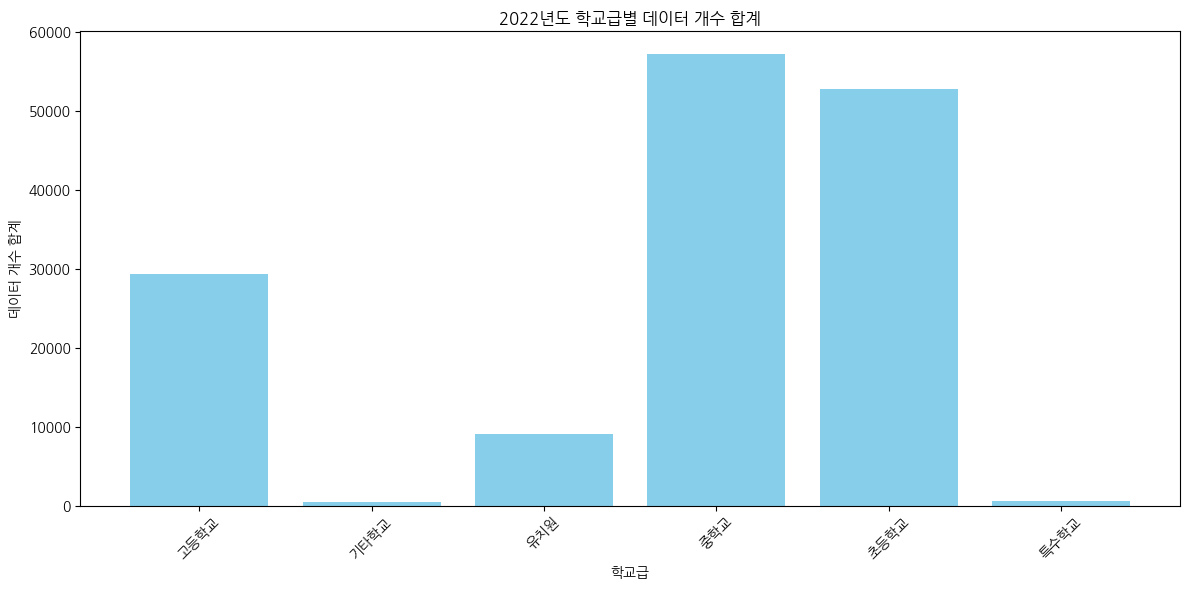

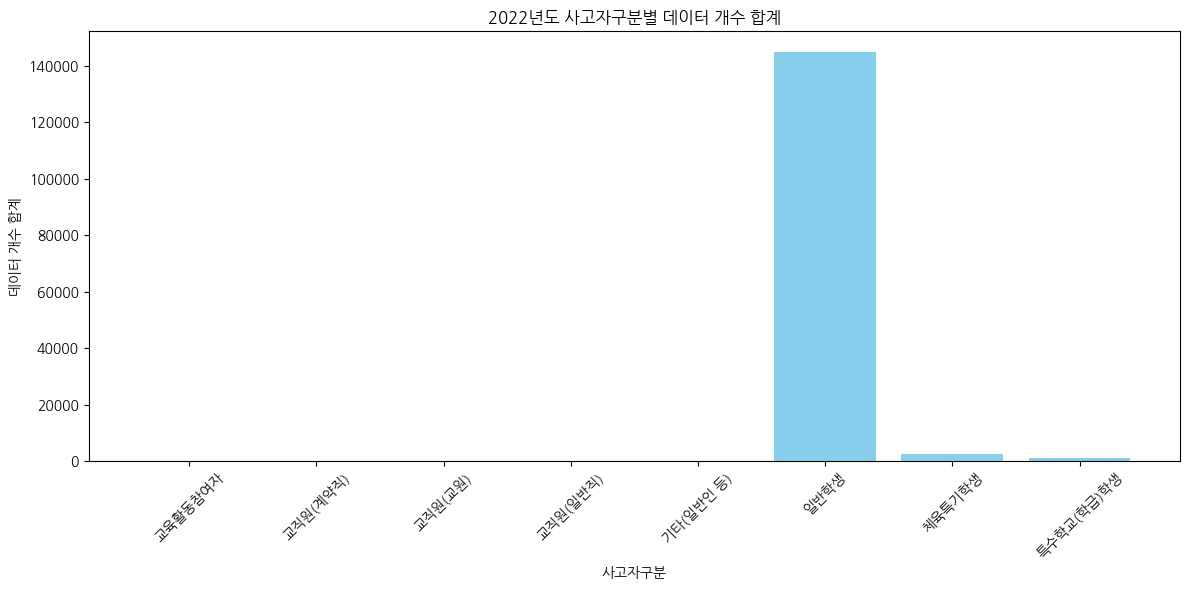

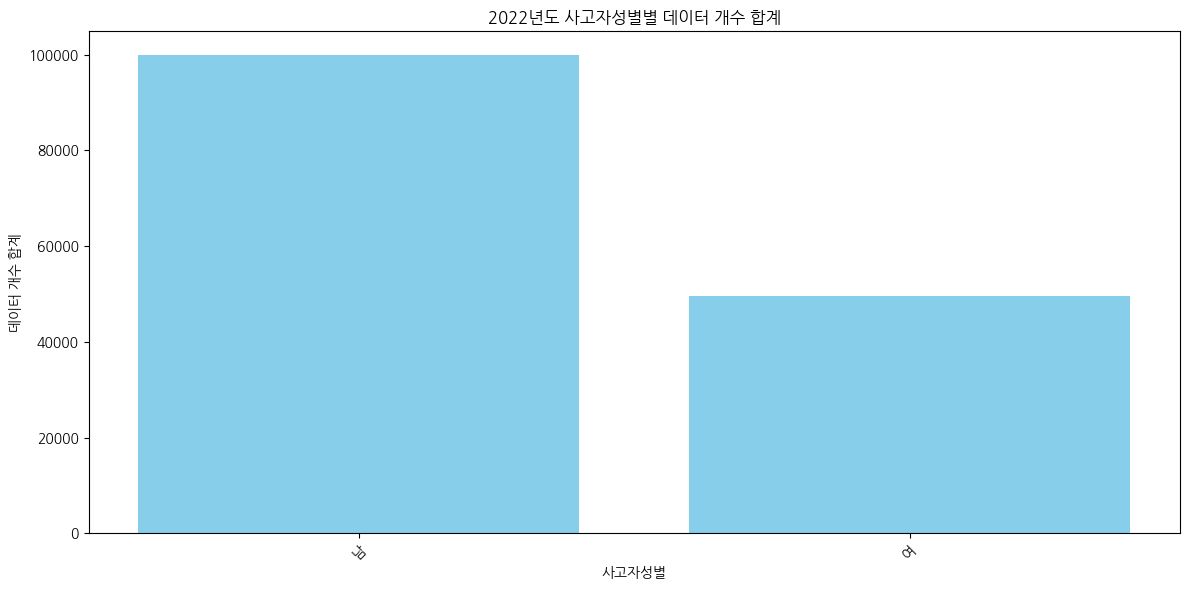

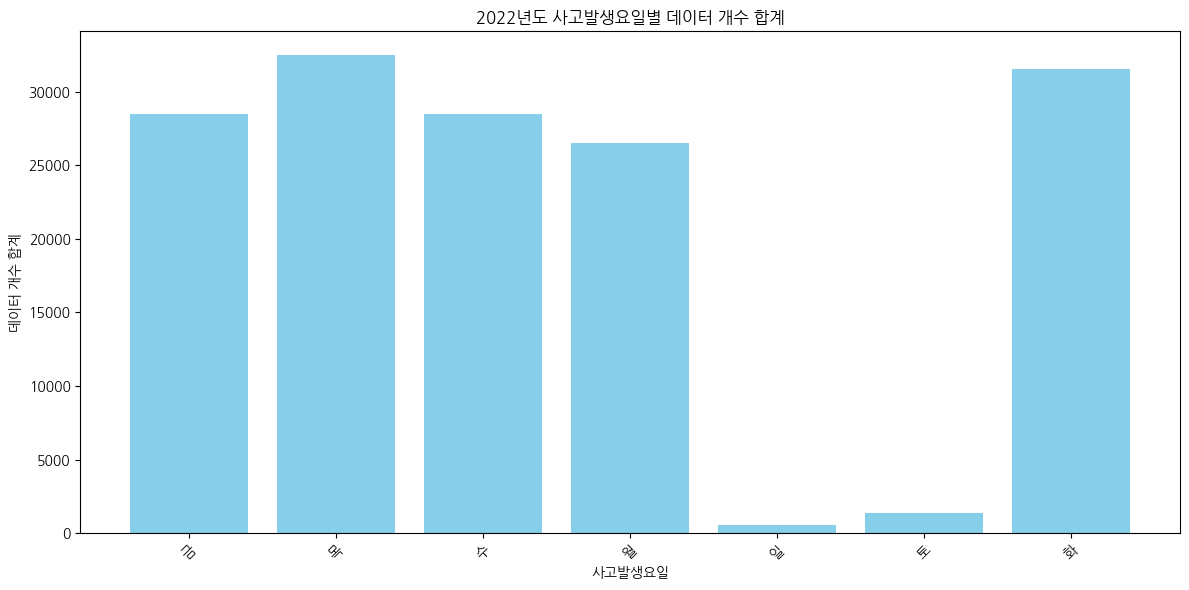

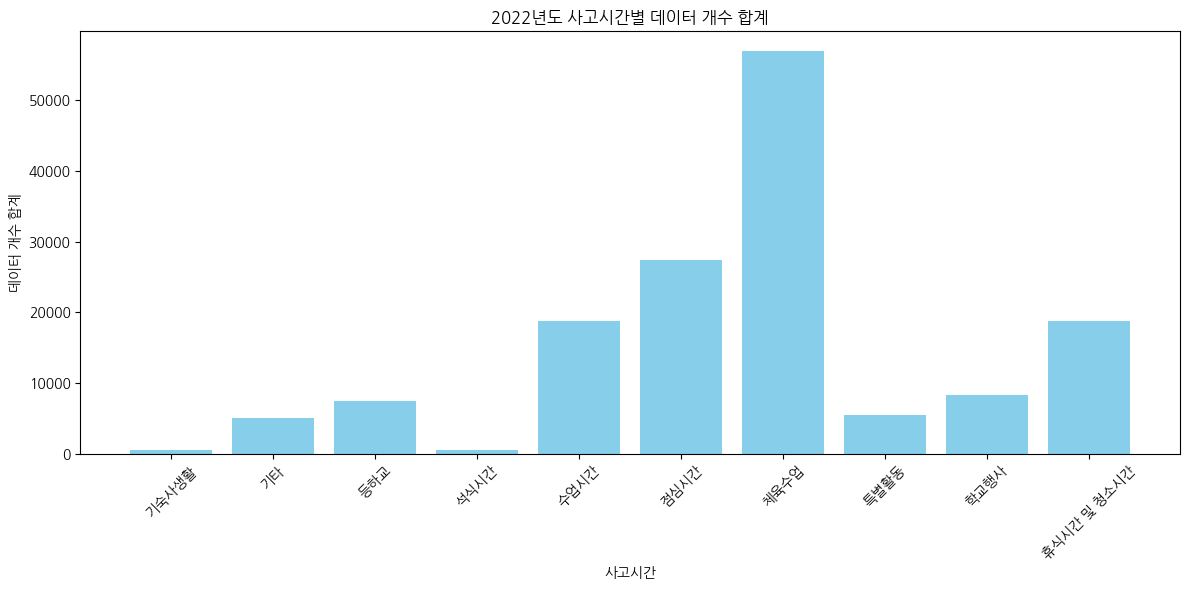

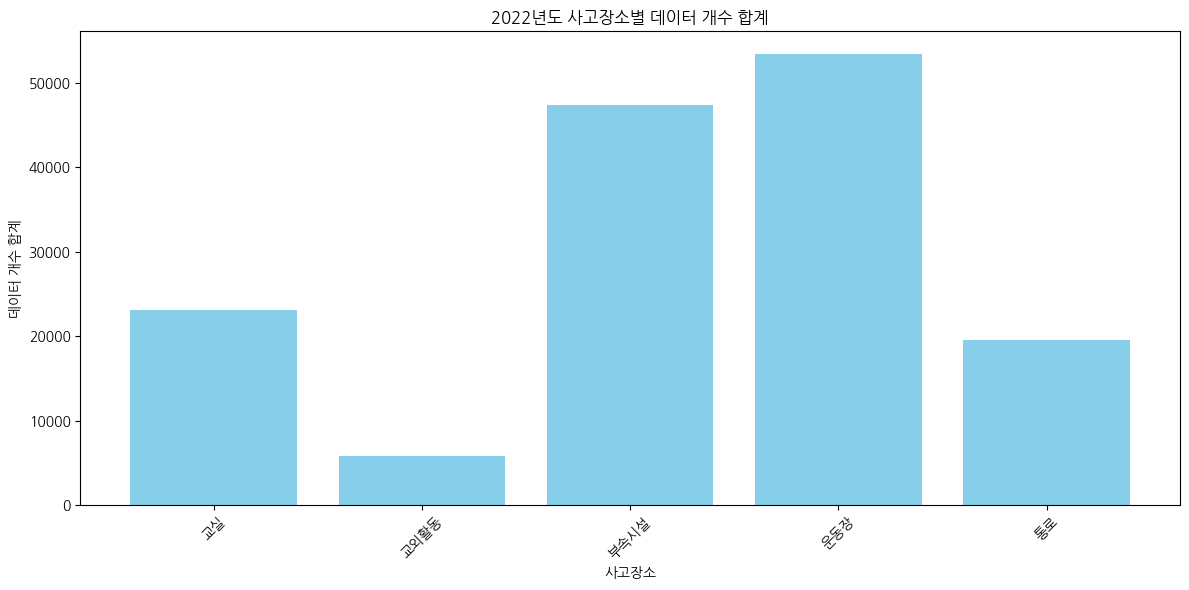

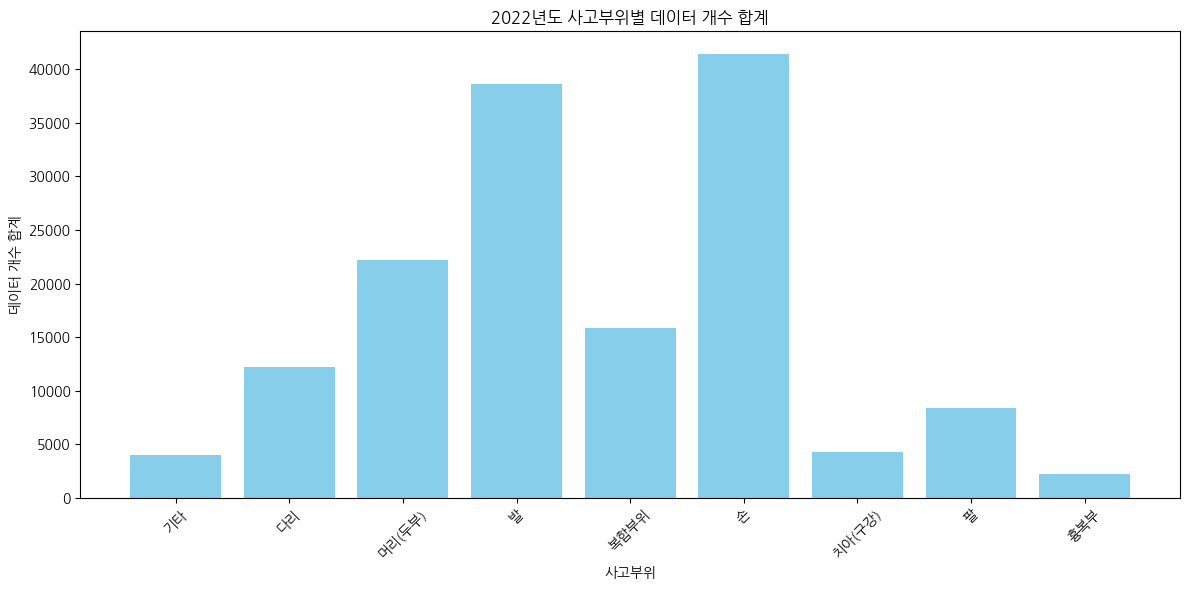

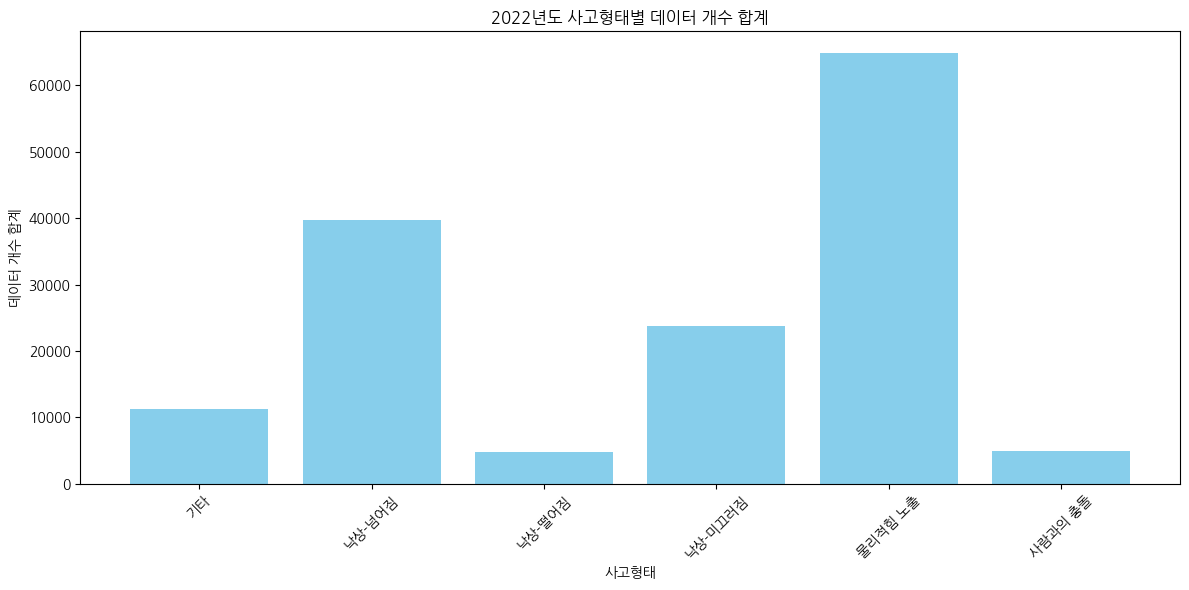

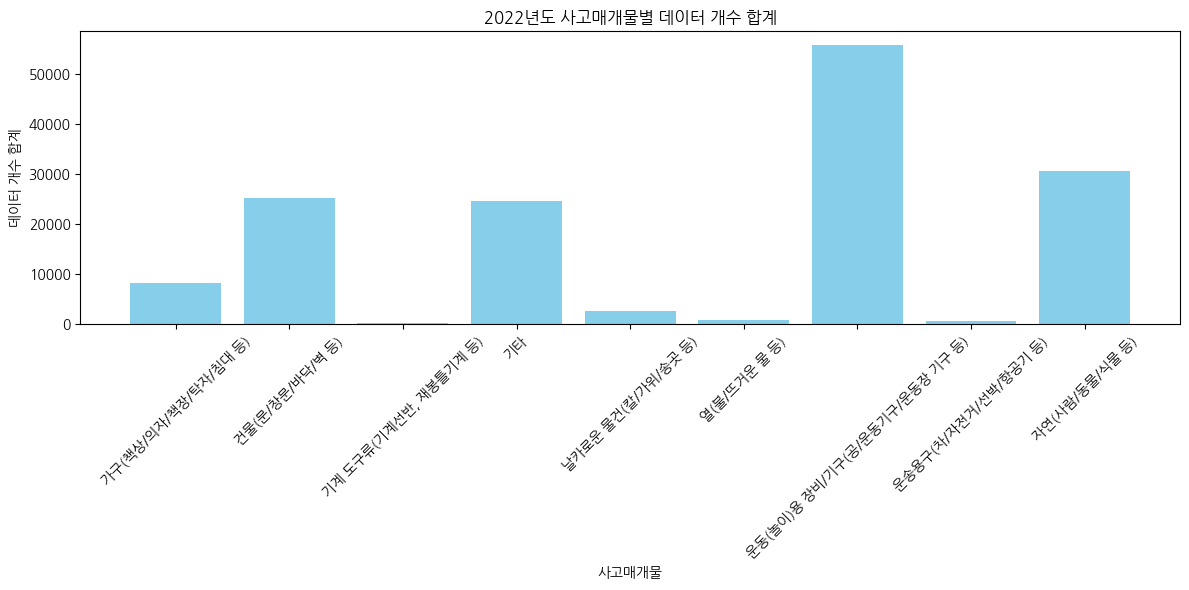

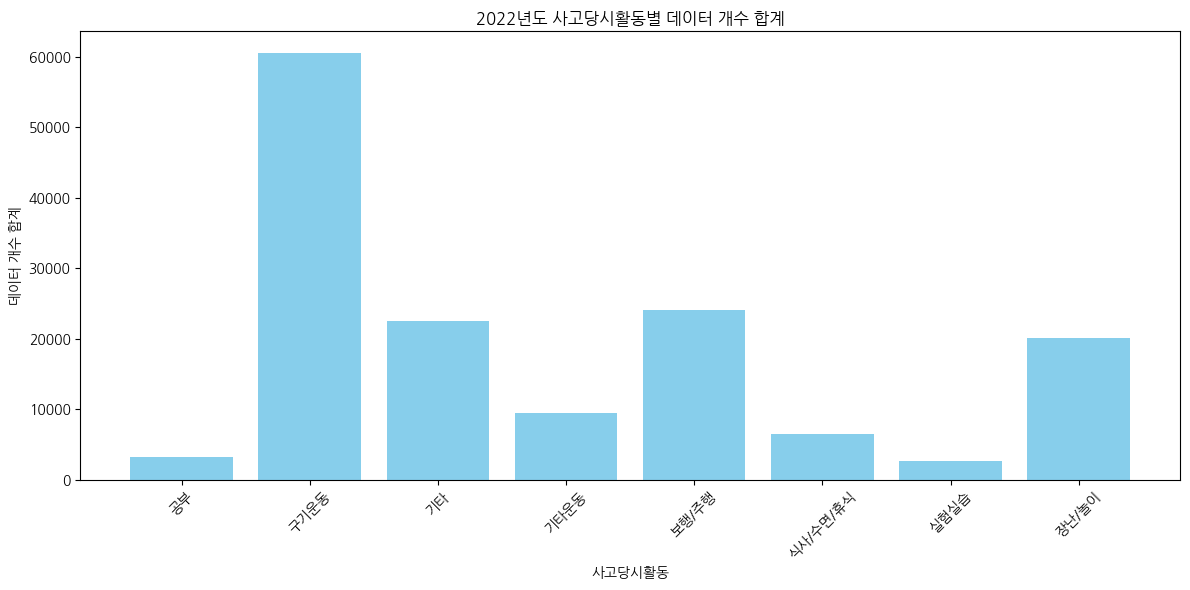

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
data2021 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2022.csv'
df_2021 = pd.read_csv(data2021)

# 그래프를 그릴 변수 리스트
variables = ['지역', '설립유형', '학교급', '사고자구분', '사고자성별', '사고발생요일', '사고시간', '사고장소', '사고부위', '사고형태', '사고매개물', '사고당시활동']

# 각 변수별로 바 그래프를 그립니다.
for var in variables:
    # 변수별로 그룹화하여 데이터 개수 합을 계산합니다.
    grouped = df_2021.groupby(var).size().reset_index(name='개수합계')

    # 바 그래프를 그립니다.
    plt.figure(figsize=(12, 6))  # 그래프의 크기 설정
    plt.bar(grouped[var], grouped['개수합계'], color='skyblue')
    plt.title(f'2022년도 {var}별 데이터 개수 합계')  # 그래프 제목
    plt.xlabel(var)  # x축 레이블
    plt.ylabel('데이터 개수 합계')  # y축 레이블
    plt.xticks(rotation=45)  # x축 레이블을 45도로 회전하여 표시
    # 그래프를 화면에 표시합니다.
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd

# CSV 파일을 읽어옵니다.
data2021 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2022.csv'
df = pd.read_csv(data2021)

# '사고발생시간' 열을 시간 형식으로 변환합니다.
df['사고발생시간'] = pd.to_datetime(df['사고발생시간'], errors='coerce')

# 00시부터 24시까지 30분 단위로 값 측정하여 출력합니다.
for hour in range(0, 24):
    for minute in [0, 30]:
        # 해당 시간대와 분에 해당하는 데이터를 필터링합니다.
        filtered_data = df[(df['사고발생시간'].dt.hour == hour) & (df['사고발생시간'].dt.minute == minute)]

        # 출력 형식을 수정하여 30분 단위를 표현합니다.
        next_minute = (minute + 30) % 60
        if next_minute == 0:
            end_time = f'{hour + 1:02d}:{next_minute:02d}'
        else:
            end_time = f'{hour:02d}:{next_minute:02d}'

        # 해당 시간대와 분의 데이터 개수를 출력합니다.
        start_time = f'{hour:02d}:{minute:02d}'
        print(f'{start_time} - {end_time} : {len(filtered_data)}건')

00:00 - 00:30 : 54건
00:30 - 01:00 : 6건
01:00 - 01:30 : 18건
01:30 - 02:00 : 6건
02:00 - 02:30 : 5건
02:30 - 03:00 : 4건
03:00 - 03:30 : 4건
03:30 - 04:00 : 3건
04:00 - 04:30 : 2건
04:30 - 05:00 : 3건
05:00 - 05:30 : 0건
05:30 - 06:00 : 0건
06:00 - 06:30 : 9건
06:30 - 07:00 : 6건
07:00 - 07:30 : 31건
07:30 - 08:00 : 77건
08:00 - 08:30 : 290건
08:30 - 09:00 : 766건
09:00 - 09:30 : 1155건
09:30 - 10:00 : 3107건
10:00 - 10:30 : 3937건
10:30 - 11:00 : 3925건
11:00 - 11:30 : 5258건
11:30 - 12:00 : 3813건
12:00 - 12:30 : 4160건
12:30 - 13:00 : 4388건
13:00 - 13:30 : 5657건
13:30 - 14:00 : 3736건
14:00 - 14:30 : 4210건
14:30 - 15:00 : 2765건
15:00 - 15:30 : 3139건
15:30 - 16:00 : 2090건
16:00 - 16:30 : 1812건
16:30 - 17:00 : 746건
17:00 - 17:30 : 550건
17:30 - 18:00 : 301건
18:00 - 18:30 : 307건
18:30 - 19:00 : 208건
19:00 - 19:30 : 147건
19:30 - 20:00 : 79건
20:00 - 20:30 : 114건
20:30 - 21:00 : 57건
21:00 - 21:30 : 72건
21:30 - 22:00 : 50건
22:00 - 22:30 : 50건
22:30 - 23:00 : 34건
23:00 - 23:30 : 31건
23:30 - 24:00 : 23건


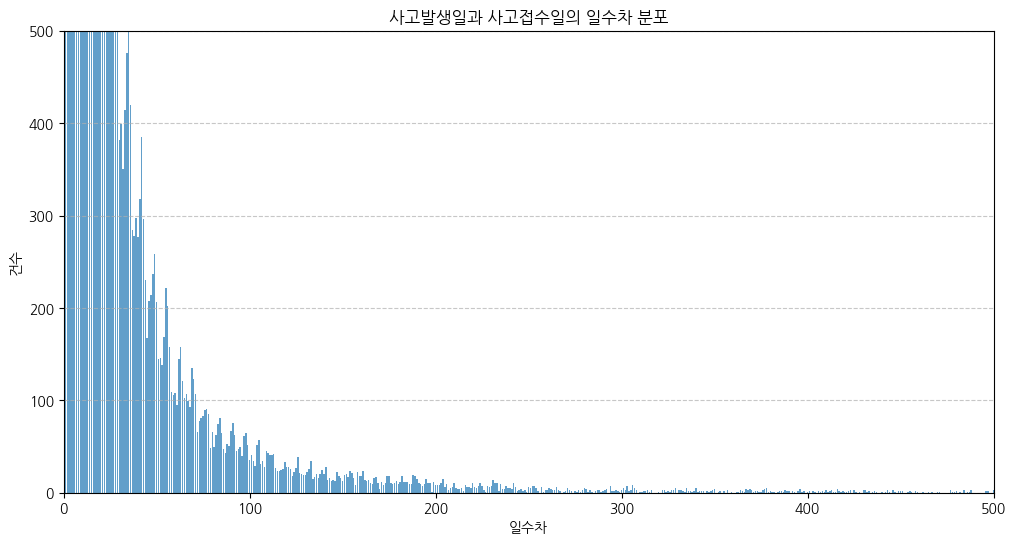

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다.
data2021 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2022.csv'
df = pd.read_csv(data2021)

# '사고발생일'과 '사고접수일' 열을 datetime 형식으로 변환합니다.
df['사고발생일'] = pd.to_datetime(df['사고발생일'], errors='coerce')
df['사고접수일'] = pd.to_datetime(df['사고접수일'], errors='coerce')

# '사고발생일'과 '사고접수일'의 차를 계산하여 '일수차' 열에 추가합니다.
df['일수차'] = (df['사고접수일'] - df['사고발생일']).dt.days

# '일수차'별 카운트를 계산합니다.
counts = df['일수차'].value_counts().sort_index()

# 바그래프로 시각화합니다.
plt.figure(figsize=(12, 6))
plt.bar(counts.index, counts.values, align='center', alpha=0.7)
plt.xlabel('일수차')
plt.ylabel('건수')
plt.title('사고발생일과 사고접수일의 일수차 분포')
plt.xlim(0, 500)  # x축 범위 설정
plt.ylim(0, 500)  # x축 범위 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#연도별 사고 현황

In [ ]:
data='https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school-2020.csv'
df_2020 = pd.read_csv(data)
data='https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2021.csv'
df_2021 = pd.read_csv(data)
data='https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2022.csv'
df_2022 = pd.read_csv(data)

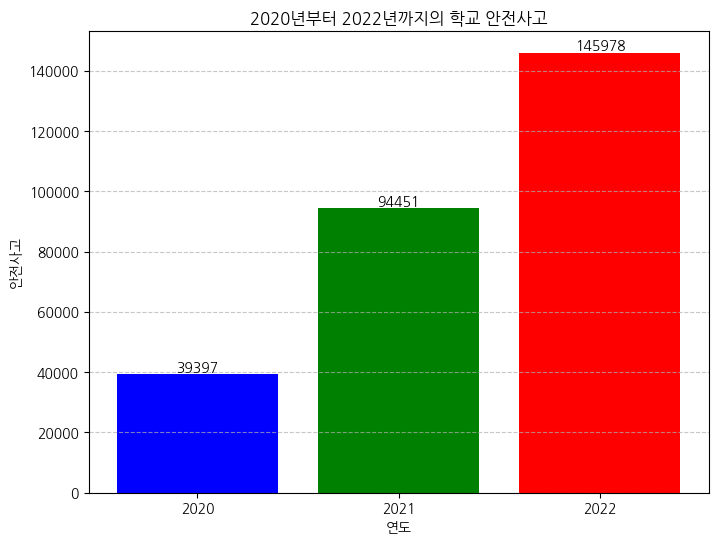

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 가져오기
data_2020 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school-2020.csv'
df_2020 = pd.read_csv(data_2020)

data_2021 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2021.csv'
df_2021 = pd.read_csv(data_2021)

data_2022 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2022.csv'
df_2022 = pd.read_csv(data_2022)

# '사고발생일'을 날짜로 변환 (만약 날짜가 이미 날짜 형식이라면 생략 가능)
df_2020['사고발생일'] = pd.to_datetime(df_2020['사고발생일'])
df_2021['사고발생일'] = pd.to_datetime(df_2021['사고발생일'])
df_2022['사고발생일'] = pd.to_datetime(df_2022['사고발생일'])

# 2020년, 2021년, 2022년 사고발생일을 연도별로 개수 카운트
accidents_2020_count = df_2020['사고발생일'].dt.year.value_counts().sort_index()
accidents_2021_count = df_2021['사고발생일'].dt.year.value_counts().sort_index()
accidents_2022_count = df_2022['사고발생일'].dt.year.value_counts().sort_index()

# 2020년부터 2022년까지의 개수 합산
total_accidents = accidents_2020_count.add(accidents_2021_count, fill_value=0)
total_accidents = total_accidents.add(accidents_2022_count, fill_value=0)
total_accidents = total_accidents[total_accidents.index >= 2020]

# 그래프 생성
plt.figure(figsize=(8, 6))

# 각 연도에 다른 색깔 지정
colors = ['blue', 'green', 'red']

plt.bar(total_accidents.index, total_accidents.values, color=colors)

# 그래프 제목과 레이블 설정
plt.title('2020년부터 2022년까지의 학교 안전사고')
plt.xlabel('연도')
plt.ylabel('안전사고')

# X 축 범위 설정
plt.xticks(total_accidents.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for year, total in total_accidents.items():
    plt.text(year, total, str(int(total)), ha='center', va='bottom')

# 그래프 표시
plt.show()

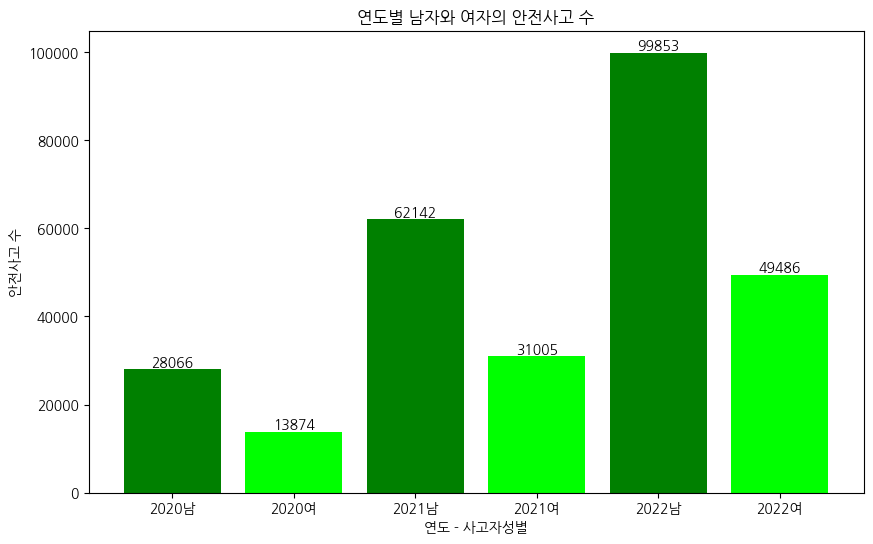

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 가져오기
data_2020 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school-2020.csv'
df_2020 = pd.read_csv(data_2020)

data_2021 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2021.csv'
df_2021 = pd.read_csv(data_2021)

data_2022 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2022.csv'
df_2022 = pd.read_csv(data_2022)

# '사고발생일'을 날짜로 변환 (만약 날짜가 이미 날짜 형식이라면 생략 가능)
df_2020['사고발생일'] = pd.to_datetime(df_2020['사고발생일'])
df_2021['사고발생일'] = pd.to_datetime(df_2021['사고발생일'])
df_2022['사고발생일'] = pd.to_datetime(df_2022['사고발생일'])

# 2020년, 2021년, 2022년 남자와 여자의 안전사고를 사고자성별로 개수 카운트
accidents_2020_male = df_2020[df_2020['사고자성별'] == '남']['사고발생일'].dt.year.value_counts().sort_index()
accidents_2020_female = df_2020[df_2020['사고자성별'] == '여']['사고발생일'].dt.year.value_counts().sort_index()

accidents_2021_male = df_2021[df_2021['사고자성별'] == '남']['사고발생일'].dt.year.value_counts().sort_index()
accidents_2021_female = df_2021[df_2021['사고자성별'] == '여']['사고발생일'].dt.year.value_counts().sort_index()

accidents_2022_male = df_2022[df_2022['사고자성별'] == '남']['사고발생일'].dt.year.value_counts().sort_index()
accidents_2022_female = df_2022[df_2022['사고자성별'] == '여']['사고발생일'].dt.year.value_counts().sort_index()

# 데이터프레임 생성
data = {
    '연도': [2020, 2020, 2021, 2021, 2022, 2022],
    '사고자성별': ['남', '여', '남', '여', '남', '여'],
    '안전사고 수': [accidents_2020_male.sum(), accidents_2020_female.sum(), accidents_2021_male.sum(), accidents_2021_female.sum(), accidents_2022_male.sum(), accidents_2022_female.sum()]
}

df = pd.DataFrame(data)

# 그래프 생성
plt.figure(figsize=(10, 6))

# 각 바 그래프에 색깔 지정
colors = ['green', 'lime', 'green', 'lime', 'green', 'lime']

# 바 그래프 그리기
plt.bar(df['연도'].astype(str) + df['사고자성별'], df['안전사고 수'], color=colors)

# 그래프 제목과 레이블 설정
plt.title('연도별 남자와 여자의 안전사고 수')
plt.xlabel('연도 - 사고자성별')
plt.ylabel('안전사고 수')

# X 축 레이블 설정
plt.xticks(df['연도'].astype(str) + df['사고자성별'])

for i, value in enumerate(df['안전사고 수']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# 그래프 표시
plt.show()

In [ ]:
import pandas as pd

# 데이터 가져오기
data_2020 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school-2020.csv'
data_2021 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2021.csv'
data_2022 = 'https://raw.githubusercontent.com/rich-hyun/Analysis_of_School_Safety_Incidents/main/school_2022.csv'

df_2020 = pd.read_csv(data_2020)
df_2021 = pd.read_csv(data_2021)
df_2022 = pd.read_csv(data_2022)

# 2020년, 2021년, 2022년 전체 사고 발생 수
total_accidents_2020 = len(df_2020)
total_accidents_2021 = len(df_2021)
total_accidents_2022 = len(df_2022)

# 2020년, 2021년, 2022년 남자 사고 발생 수
male_accidents_2020 = len(df_2020[df_2020['사고자성별'] == '남'])
male_accidents_2021 = len(df_2021[df_2021['사고자성별'] == '남'])
male_accidents_2022 = len(df_2022[df_2022['사고자성별'] == '남'])

# 2020년, 2021년, 2022년 여자 사고 발생 수
female_accidents_2020 = len(df_2020[df_2020['사고자성별'] == '여'])
female_accidents_2021 = len(df_2021[df_2021['사고자성별'] == '여'])
female_accidents_2022 = len(df_2022[df_2022['사고자성별'] == '여'])

# 결과 출력
print("2020년 전체 사고 발생 수:", total_accidents_2020)
print("2021년 전체 사고 발생 수:", total_accidents_2021)
print("2022년 전체 사고 발생 수:", total_accidents_2022)

print("2020년 남자 사고 발생 수:", male_accidents_2020)
print("2021년 남자 사고 발생 수:", male_accidents_2021)
print("2022년 남자 사고 발생 수:", male_accidents_2022)

print("2020년 여자 사고 발생 수:", female_accidents_2020)
print("2021년 여자 사고 발생 수:", female_accidents_2021)
print("2022년 여자 사고 발생 수:", female_accidents_2022)

2020년 전체 사고 발생 수: 41940
2021년 전체 사고 발생 수: 93147
2022년 전체 사고 발생 수: 149339
2020년 남자 사고 발생 수: 28066
2021년 남자 사고 발생 수: 62142
2022년 남자 사고 발생 수: 99853
2020년 여자 사고 발생 수: 13874
2021년 여자 사고 발생 수: 31005
2022년 여자 사고 발생 수: 49486


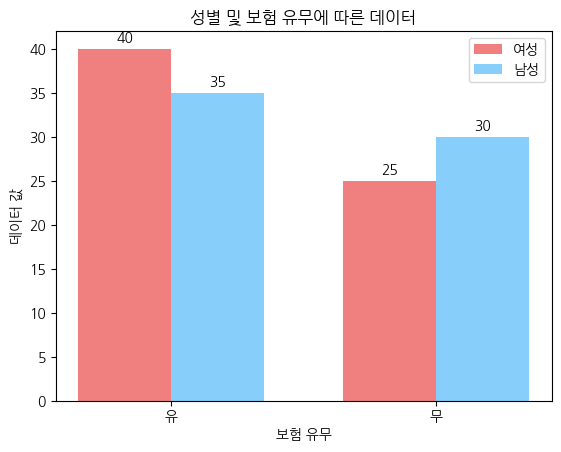

In [ ]:
import matplotlib.pyplot as plt

# 데이터
categories = ['유', '무']
female_values = [40, 25]  # 여성의 유인과 무인의 수 조정
male_values = [35, 30]    # 남성의 유인과 무인의 수 조정

# 그래프 폭 설정
bar_width = 0.35

# 그래프 위치 조정
index = range(len(categories))

# 여성 바 그래프
female_bars = plt.bar([i - bar_width/2 for i in index], female_values, bar_width, label='여성', color='lightcoral')

# 남성 바 그래프
male_bars = plt.bar([i + bar_width/2 for i in index], male_values, bar_width, label='남성', color='lightskyblue')

# X 축 레이블 설정
plt.xticks(index, categories)

# 그래프 제목과 레이블 설정
plt.title('성별 및 보험 유무에 따른 데이터')
plt.xlabel('보험 유무')
plt.ylabel('데이터 값')

# 범례 추가
plt.legend()

# 숫자 표시
for bar in female_bars + male_bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

# 그래프 표시
plt.show()

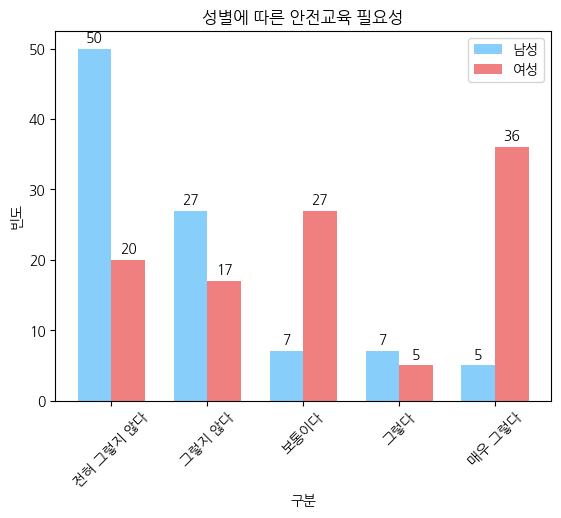

In [ ]:
import matplotlib.pyplot as plt

# 데이터
categories = ['전혀 그렇지 않다', '그렇지 않다', '보통이다', '그렇다', '매우 그렇다']
female_values = [20, 17, 27, 5, 36]
male_values = [50, 27, 7, 7, 5]

# 그래프 폭 설정
bar_width = 0.35

# 그래프 위치 조정
index = range(len(categories))

# 남성 바 그래프
male_bars = plt.bar([i - bar_width/2 for i in index], male_values, bar_width, label='남성', color='lightskyblue')

# 여성 바 그래프
female_bars = plt.bar([i + bar_width/2 for i in index], female_values, bar_width, label='여성', color='lightcoral')

# X 축 레이블 설정
plt.xticks(index, categories, rotation=45)

# 그래프 제목과 레이블 설정
plt.title('성별에 따른 안전교육 필요성')
plt.xlabel('구분')
plt.ylabel('빈도')

# 범례 추가
plt.legend()

# 숫자 표시
for bars in [male_bars, female_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords='offset points', ha='center', va='bottom')

# 그래프 표시
plt.show()

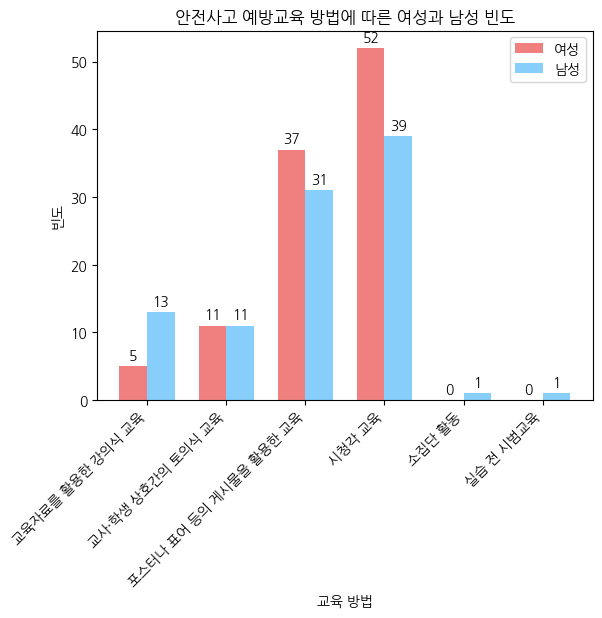

In [ ]:
import matplotlib.pyplot as plt

# 데이터
categories = ['교육자료를 활용한 강의식 교육', '교사·학생 상호간의 토의식 교육', '포스터나 표어 등의 게시물을 활용한 교육', '시청각 교육', '소집단 활동', '실습 전 시범교육']
female_values = [5, 11, 37, 52, 0, 0]
male_values = [13, 11, 31, 39, 1, 1]

# 그래프 폭 설정
bar_width = 0.35

# 그래프 위치 조정
index = range(len(categories))

# 여성 바 그래프
female_bars = plt.bar([i - bar_width/2 for i in index], female_values, bar_width, label='여성', color='lightcoral')

# 남성 바 그래프
male_bars = plt.bar([i + bar_width/2 for i in index], male_values, bar_width, label='남성', color='lightskyblue')

# X 축 레이블 설정
plt.xticks(index, categories, rotation=45, ha='right')  # x축 레이블을 오른쪽으로 회전

# 그래프 제목과 레이블 설정
plt.title('안전사고 예방교육 방법에 따른 여성과 남성 빈도')
plt.xlabel('교육 방법')
plt.ylabel('빈도')

# 범례 추가
plt.legend()

# 숫자 표시
for bars in [female_bars, male_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords='offset points', ha='center', va='bottom')

# 그래프 표시
plt.show()

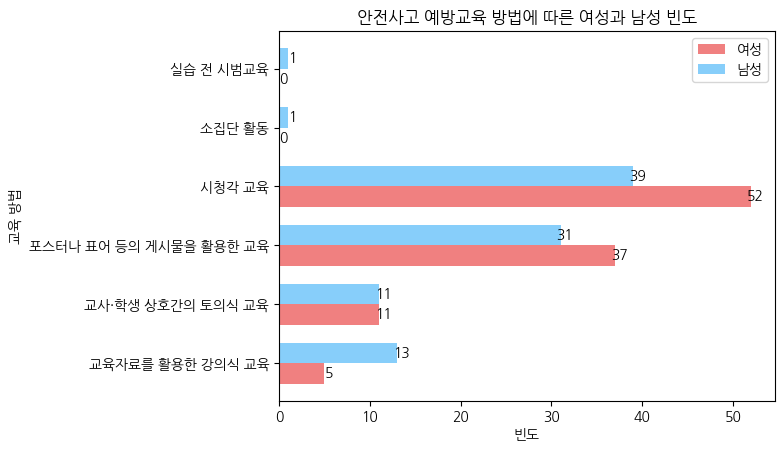

In [ ]:
import matplotlib.pyplot as plt

# 데이터
categories = ['교육자료를 활용한 강의식 교육', '교사·학생 상호간의 토의식 교육', '포스터나 표어 등의 게시물을 활용한 교육', '시청각 교육', '소집단 활동', '실습 전 시범교육']
female_values = [5, 11, 37, 52, 0, 0]
male_values = [13, 11, 31, 39, 1, 1]

# 그래프 폭 설정
bar_width = 0.35

# 그래프 위치 조정
index = range(len(categories))

# 여성 바 그래프
female_bars = plt.barh([i - bar_width/2 for i in index], female_values, bar_width, label='여성', color='lightcoral')

# 남성 바 그래프
male_bars = plt.barh([i + bar_width/2 for i in index], male_values, bar_width, label='남성', color='lightskyblue')

# Y 축 레이블 설정
plt.yticks(index, categories)

# 그래프 제목과 레이블 설정
plt.title('안전사고 예방교육 방법에 따른 여성과 남성 빈도')
plt.ylabel('교육 방법')
plt.xlabel('빈도')

# 범례 추가
plt.legend()

# 숫자 표시
for bars in [female_bars, male_bars]:
    for bar in bars:
        width = bar.get_width()
        plt.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(3, 0),
                     textcoords='offset points', ha='center', va='center')

# 그래프 표시
plt.show()

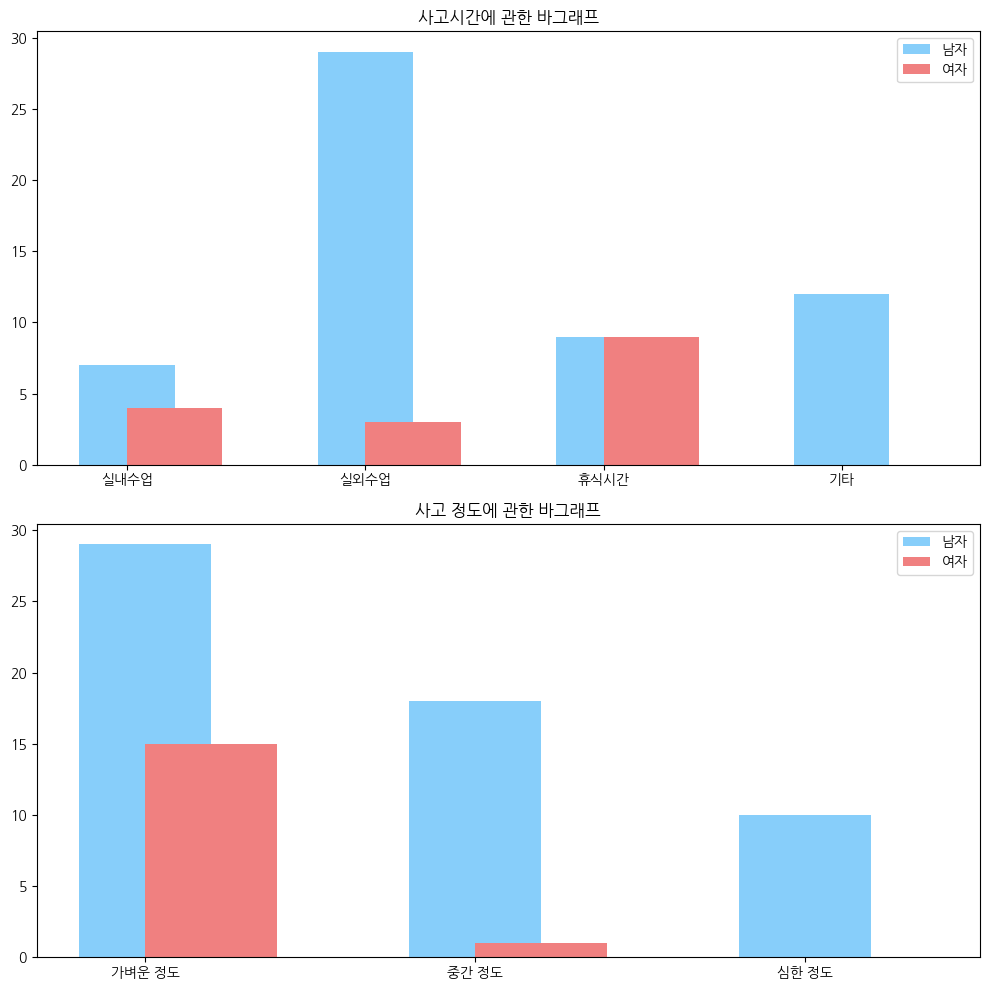

In [ ]:
import matplotlib.pyplot as plt

# 수정된 사고시간 데이터
categories_time = ['실내수업', '실외수업', '휴식시간', '기타']
male_values_time = [7, 29, 9, 12]
female_values_time = [4, 3, 9, 0]

# 수정된 사고 정도 데이터
categories_degree = ['가벼운 정도', '중간 정도', '심한 정도']
male_values_degree = [29, 18, 10]
female_values_degree = [15, 1, 0]

# 그래프 그리기
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# 사고시간에 관한 바그래프
axs[0].bar(categories_time, male_values_time, width=0.4, label='남자', color='lightskyblue', align='center')
axs[0].bar(categories_time, female_values_time, width=0.4, label='여자', color='lightcoral', align='edge')
axs[0].set_title('사고시간에 관한 바그래프')
axs[0].legend()

# 사고 정도에 관한 바그래프
axs[1].bar(categories_degree, male_values_degree, width=0.4, label='남자', color='lightskyblue', align='center')
axs[1].bar(categories_degree, female_values_degree, width=0.4, label='여자', color='lightcoral', align='edge')
axs[1].set_title('사고 정도에 관한 바그래프')
axs[1].legend()

plt.tight_layout()
plt.show()

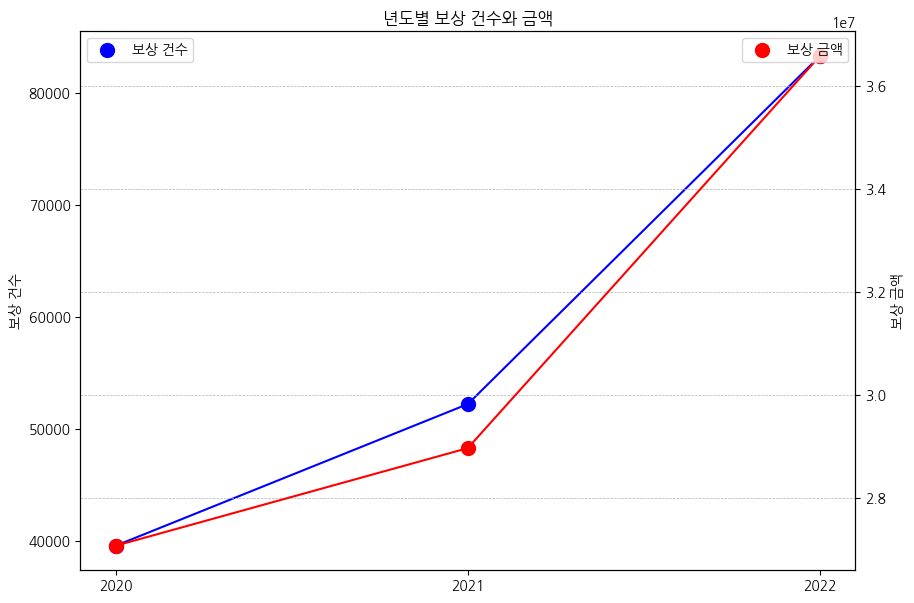

In [ ]:
import matplotlib.pyplot as plt

# 년도 데이터
years = ['2020', '2021', '2022']

# 보상 건수 데이터
count_values = [39567, 52226, 83342]

# 보상 금액 데이터
amount_values = [27077645, 28974763, 36595132]

plt.figure(figsize=(10, 7))

# 보상 건수 점그래프와 연결선
plt.scatter(years, count_values, color='blue', s=100, label='보상 건수')
plt.plot(years, count_values, color='blue', linestyle='-', marker='o')
plt.ylabel("보상 건수")
plt.legend(loc='upper left')

# 보상 금액 점그래프와 연결선을 위한 두 번째 y축 생성
ax2 = plt.gca().twinx()
ax2.scatter(years, amount_values, color='red', s=100, label='보상 금액')
ax2.plot(years, amount_values, color='red', linestyle='-', marker='o')
ax2.set_ylabel('보상 금액')
ax2.legend(loc='upper right')

# 그래프 설정
plt.title("년도별 보상 건수와 금액")
plt.xlabel("년도")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()